In [26]:
import pandas as pd

df=pd.read_csv("amazon_india_complete_2015_2025.csv")

In [27]:
df.shape

(1127609, 34)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127609 entries, 0 to 1127608
Data columns (total 34 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1127609 non-null  object 
 1   order_date              1127609 non-null  object 
 2   customer_id             1127609 non-null  object 
 3   product_id              1127609 non-null  object 
 4   product_name            1127609 non-null  object 
 5   category                1127609 non-null  object 
 6   subcategory             1127609 non-null  object 
 7   brand                   1127609 non-null  object 
 8   original_price_inr      1127609 non-null  object 
 9   discount_percent        1127609 non-null  float64
 10  discounted_price_inr    1127609 non-null  float64
 11  quantity                1127609 non-null  int64  
 12  subtotal_inr            1127609 non-null  float64
 13  delivery_charges        1037408 non-null  float64
 14  fi

In [29]:
missing_value=df.isna().sum()
print(missing_value)

transaction_id                 0
order_date                     0
customer_id                    0
product_id                     0
product_name                   0
category                       0
subcategory                    0
brand                          0
original_price_inr             0
discount_percent               0
discounted_price_inr           0
quantity                       0
subtotal_inr                   0
delivery_charges           90201
final_amount_inr               0
customer_city                  0
customer_state                 0
customer_tier                  0
customer_spending_tier         0
customer_age_group        135315
payment_method                 0
delivery_days                  0
delivery_type                  0
is_prime_member                0
is_festival_sale               0
festival_name             777736
customer_rating           341696
return_status                  0
order_month                    0
order_year                     0
order_quar

In [30]:
missing_value=df.isnull().sum()
print(missing_value[missing_value>0])

print(f"Total missing values: {df.isnull().sum().sum()}")

print(f"Percentage of missing data: {df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%")


delivery_charges       90201
customer_age_group    135315
festival_name         777736
customer_rating       341696
dtype: int64
Total missing values: 1344948
Percentage of missing data: 3.51%


In [31]:
#filling the delivery charges

df["delivery_charges"].unique()

array([ 0., nan, 40.])

In [32]:
# filling with median values

median_value = df["delivery_charges"].median()  
df["delivery_charges"] = df["delivery_charges"].fillna(median_value)


In [33]:
print("Missing values in delivery charges:",df["delivery_charges"].isna().sum())

Missing values in delivery charges: 0


In [34]:
df["customer_age_group"].unique()

array(['36-45', nan, '46-55', '18-25', '26-35', '55+'], dtype=object)

In [35]:
#customer age group


df['customer_age_group'] = df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])
df['customer_age_group'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1127609 entries, 0 to 1127608
Series name: customer_age_group
Non-Null Count    Dtype 
--------------    ----- 
1127609 non-null  object
dtypes: object(1)
memory usage: 8.6+ MB


In [36]:
# filling customer rating
df["customer_rating"].unique()

array(['4.0', '5/5', '5.0', '5.0 stars', '3.5', nan, '4.0 stars', '4.5',
       '3.0', '4.5 stars', '4/5', '3/5', '4.5/5.0', '3.0 stars',
       '5.0/5.0', '4.0/5.0', '3.0/5.0', '3.5/5.0', '3', '3.5 stars', '4',
       '5'], dtype=object)

In [37]:
import numpy as np

def clean_rating(value):
    if pd.isna(value):
        return np.nan
    
    value = value.strip().lower()
    #remove stars
    value = value.replace('stars', '').strip()
    
    if "/" in value:
        parts=value.split("/")
        
        try:
            numerator=float(parts[0].strip())
            denominator=float(parts[1].strip())
            
            if denominator !=0:
                return round((numerator / denominator) * 5, 2)
            else:
                return np.nan
        except:
            return np.nan
     
    # if no. is plain   
    try:
        return float(value)
    except:
        return np.nan
    
    

df["customer_rating"]=df["customer_rating"].apply(clean_rating).astype(float)


        

In [38]:
df["customer_rating"].unique()

array([4. , 5. , 3.5, nan, 4.5, 3. ])

In [39]:
df["customer_rating"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1127609 entries, 0 to 1127608
Series name: customer_rating
Non-Null Count   Dtype  
--------------   -----  
785913 non-null  float64
dtypes: float64(1)
memory usage: 8.6 MB


In [40]:
df["customer_rating"].isna().sum()

np.int64(341696)

In [41]:
# filling the value by imputer

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge




# using iterative imputer
imputer=IterativeImputer(estimator=BayesianRidge(),max_iter=10, random_state=0)

df[["customer_rating"]] = imputer.fit_transform(df[["customer_rating"]])

# Convert to float
df["customer_rating"] = (df["customer_rating"] * 2).round() / 2


print("Null values in customer_rating:",df["customer_rating"].isna().sum())

Null values in customer_rating: 0


In [42]:
df["customer_rating"].unique()

array([4. , 5. , 3.5, 4.5, 3. ])

In [43]:
df["customer_rating"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1127609 entries, 0 to 1127608
Series name: customer_rating
Non-Null Count    Dtype  
--------------    -----  
1127609 non-null  float64
dtypes: float64(1)
memory usage: 8.6 MB


In [44]:
df.isna().sum()

transaction_id                 0
order_date                     0
customer_id                    0
product_id                     0
product_name                   0
category                       0
subcategory                    0
brand                          0
original_price_inr             0
discount_percent               0
discounted_price_inr           0
quantity                       0
subtotal_inr                   0
delivery_charges               0
final_amount_inr               0
customer_city                  0
customer_state                 0
customer_tier                  0
customer_spending_tier         0
customer_age_group             0
payment_method                 0
delivery_days                  0
delivery_type                  0
is_prime_member                0
is_festival_sale               0
festival_name             777736
customer_rating                0
return_status                  0
order_month                    0
order_year                     0
order_quar

Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [45]:

formats = ["%d/%m/%Y", "%d-%m-%Y", "%Y-%m-%d","%m/%d/%Y"]

# Try parsing with known formats one by one
ser = None
for fmt in formats:
    if ser is None:
        ser = pd.to_datetime(df["order_date"], format=fmt, errors="coerce", dayfirst=True)
    else:
        ser = ser.fillna(pd.to_datetime(df["order_date"], format=fmt, errors="coerce", dayfirst=True))

# Final attempt using inference
ser = ser.fillna(pd.to_datetime(df["order_date"], errors="coerce", dayfirst=True, infer_datetime_format=True))

# Assign the cleaned and formatted date
df["order_date_cleaned"] = ser.dt.strftime('%Y-%m-%d')




C:\Users\offic\AppData\Local\Temp\ipykernel_8760\879503297.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ser = ser.fillna(pd.to_datetime(df["order_date"], errors="coerce", dayfirst=True, infer_datetime_format=True))
C:\Users\offic\AppData\Local\Temp\ipykernel_8760\879503297.py:12: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  ser = ser.fillna(pd.to_datetime(df["order_date"], errors="coerce", dayfirst=True, infer_datetime_format=True))


In [46]:
df["order_date_cleaned"] = pd.to_datetime(df["order_date_cleaned"], format='%Y-%m-%d', errors='coerce')


In [47]:
print(df["order_date_cleaned"].dtypes)

datetime64[ns]


In [48]:
print(df["order_date_cleaned"].isna().sum())

0


Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [49]:
df['original_price_inr'] = df['original_price_inr'].astype(str) \
                           .str.replace('₹','', regex=False) \
                           .str.replace(',','', regex=False) \
                           .str.replace('Rs','', regex=False)

# Converting to numeric
df['original_price_inr'] = pd.to_numeric(df['original_price_inr'], errors='coerce')


print(df['original_price_inr'].info())
print(df["original_price_inr"].isnull().sum())




<class 'pandas.core.series.Series'>
RangeIndex: 1127609 entries, 0 to 1127608
Series name: original_price_inr
Non-Null Count    Dtype  
--------------    -----  
1127609 non-null  float64
dtypes: float64(1)
memory usage: 8.6 MB
None
0


Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [50]:
df["customer_rating"].unique()

array([4. , 5. , 3.5, 4.5, 3. ])

Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [51]:
df["customer_city"].unique()

array(['Kolkata', 'Ludhiana', 'Bangalore', 'Kochi', 'Mumbai', 'Delhi',
       'Aligarh', 'Surat', 'Kanpur', 'Chennai', 'Hyderabad', 'Bareilly',
       'Vadodara', 'Indore', 'Visakhapatnam', 'Lucknow', 'Pune',
       'Bhubaneswar', 'Nagpur', 'Patna', 'Ahmedabad', 'Jaipur', 'Meerut',
       'Allahabad', 'Varanasi', 'Coimbatore', 'Moradabad', 'Saharanpur',
       'Chandigarh', 'New Delhi', 'Gorakhpur', 'Delhi NCR', 'delhi',
       'Bengalore', 'Banglore', 'CHENNAI', 'Mumbai ', 'mumba', 'chenai',
       'Bengaluru', 'Calcutta', 'Kolkata ', 'KOLKATA', 'DELHI', 'Bombay',
       'Madras', 'kolkata', 'Chennai ', 'MUMBAI', 'BANGALORE'],
      dtype=object)

In [52]:

df['customer_city'] = df['customer_city'].str.strip().str.lower()

CITY = {
    "bangalore": "Bengaluru",
    "bengaluru": "Bengaluru",
    "banglore": "Bengaluru",
    "bengalore": "Bengaluru",
    "bangluru": "Bengaluru",

    "bombay": "Mumbai",
    "mumbai": "Mumbai",
    "mumba": "Mumbai",
    "mumbai ": "Mumbai",

    "new delhi": "Delhi",
    "delhi": "Delhi",
    "delhi ncr": "Delhi",

    "kolkata": "Kolkata",
    "kolkata ": "Kolkata",
    "calcutta": "Kolkata",
    "kolkatta": "Kolkata",

    "chennai": "Chennai",
    "chenai": "Chennai",
    "chennai ": "Chennai",
    "madras": "Chennai",
}


df["customer_city"]=df["customer_city"].replace(CITY)


df['customer_city'] = df['customer_city'].str.title() #captailize first letter


In [53]:
print(df['customer_city'].unique())

['Kolkata' 'Ludhiana' 'Bengaluru' 'Kochi' 'Mumbai' 'Delhi' 'Aligarh'
 'Surat' 'Kanpur' 'Chennai' 'Hyderabad' 'Bareilly' 'Vadodara' 'Indore'
 'Visakhapatnam' 'Lucknow' 'Pune' 'Bhubaneswar' 'Nagpur' 'Patna'
 'Ahmedabad' 'Jaipur' 'Meerut' 'Allahabad' 'Varanasi' 'Coimbatore'
 'Moradabad' 'Saharanpur' 'Chandigarh' 'Gorakhpur']


In [54]:
df["customer_city"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1127609 entries, 0 to 1127608
Series name: customer_city
Non-Null Count    Dtype 
--------------    ----- 
1127609 non-null  object
dtypes: object(1)
memory usage: 8.6+ MB


Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [55]:
print(df["is_prime_eligible"].unique())
print(df["is_festival_sale"].unique())
print(df["is_prime_member"].unique())

['True' 'False' 'Yes' 'TRUE' 'FALSE' '1' '0' 'No']
['False' 'True' 'FALSE' 'TRUE' 'No' '1' '0' 'Yes']
['False' '0' '1' 'True' 'Yes' 'No' 'FALSE' 'TRUE']


In [56]:
#Here set the all boolin true/false and set type bool from object

boolian={
    "TRUE": True,
    "FALSE": False,
    "No": False,
    "1": True,
    "0": False,
    "Yes": True,
    "True": True,
    "False": False
}

df[["is_prime_eligible","is_festival_sale","is_prime_member"]] = df[["is_prime_eligible","is_festival_sale","is_prime_member"]].replace(boolian).astype(bool)

C:\Users\offic\AppData\Local\Temp\ipykernel_8760\1761372029.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[["is_prime_eligible","is_festival_sale","is_prime_member"]] = df[["is_prime_eligible","is_festival_sale","is_prime_member"]].replace(boolian).astype(bool)


In [57]:
print(df["is_prime_eligible"].unique())
print(df["is_festival_sale"].unique())
print(df["is_prime_member"].unique())

[ True False]
[False  True]
[False  True]


In [58]:
df["is_prime_eligible"].head(5)

0     True
1    False
2     True
3     True
4    False
Name: is_prime_eligible, dtype: bool

In [59]:
df[["is_prime_eligible","is_festival_sale","is_prime_member"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127609 entries, 0 to 1127608
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   is_prime_eligible  1127609 non-null  bool 
 1   is_festival_sale   1127609 non-null  bool 
 2   is_prime_member    1127609 non-null  bool 
dtypes: bool(3)
memory usage: 3.2 MB


Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [60]:
df["category"].unique()

array(['Electronics', 'Electronicss', 'Electronic',
       'Electronics & Accessories', 'ELECTRONICS'], dtype=object)

In [61]:
#  Normalize to lowercase 
df['category'] = df['category'].str.strip().str.lower()

#  Define a mapping for variations
CATEGORY_MAP = {
    "electronics": "Electronics",
    "electronic": "Electronics",
    "electronics & accessories": "Electronics",
    "electronicss": "Electronics"
    
}

# mapping
df['category'] = df['category'].replace(CATEGORY_MAP)

#  title case for display
df['category'] = df['category'].str.title()





In [62]:
print(df['category'].unique())

['Electronics']


In [63]:
df["category"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1127609 entries, 0 to 1127608
Series name: category
Non-Null Count    Dtype 
--------------    ----- 
1127609 non-null  object
dtypes: object(1)
memory usage: 8.6+ MB


Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [64]:
df["delivery_days"].unique()

array(['3', '6', '4', '5', '2', '1', 'Same Day', '1-2 days', '7', '-1',
       'Express', '15', '0'], dtype=object)

In [65]:
mapping = {
    'Same Day': 0,
    '1-2 days': 1,
    'Express': 0
}

def convert(value):
    if value in mapping:
        return mapping[value]
    try:
        return int(value)
    except ValueError:
        return -1 
    

df["delivery_days"]=df["delivery_days"].apply(convert)

#now convert into type as integer

df["delivery_days"] = pd.to_numeric(df["delivery_days"], errors='coerce')

    
    

In [66]:
invalid=(df["delivery_days"] == -1).sum()
print(invalid)

6836


In [67]:
# filling with imputer

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge


df["delivery_days"] = df["delivery_days"].replace(-1, np.nan)

# using iterative imputer
imputer=IterativeImputer(estimator=BayesianRidge(),max_iter=10, random_state=0)

df[["delivery_days"]] = imputer.fit_transform(df[["delivery_days"]])

# Convert to integer 
df["delivery_days"] = df["delivery_days"].round().astype(int)

print(df["delivery_days"].isna().sum())



0


In [68]:
df["delivery_days"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1127609 entries, 0 to 1127608
Series name: delivery_days
Non-Null Count    Dtype
--------------    -----
1127609 non-null  int64
dtypes: int64(1)
memory usage: 8.6 MB


Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


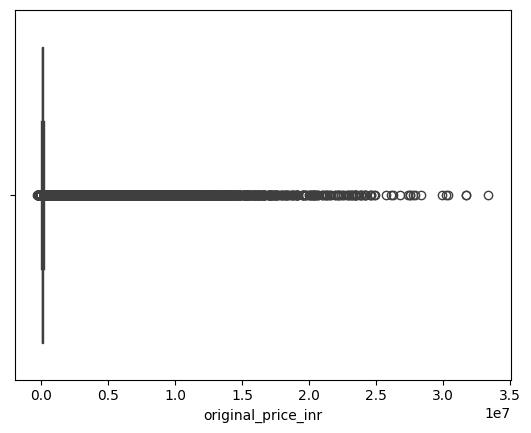

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["original_price_inr"])
plt.show()

Detected outliers: 40393


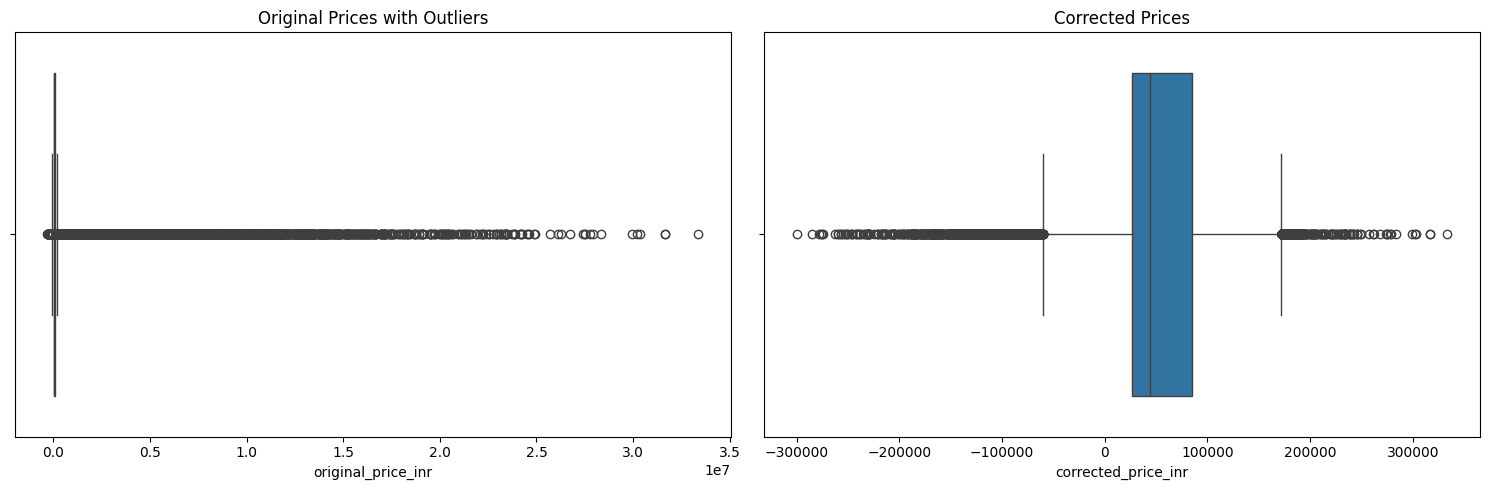

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


n = df["original_price_inr"].copy()

# removing outliers...

q1 = n.quantile(0.25)
q3 = n.quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# outlier above the upper bound
outliers = df[df["original_price_inr"] > upper_bound]
print(f"Detected outliers: {outliers.shape[0]}")

# Correct those outliers assuming they were inflated by 100x
df["corrected_price_inr"] = df["original_price_inr"]

df.loc[df["original_price_inr"] > upper_bound, "corrected_price_inr"] = df["original_price_inr"] / 100

# visualization  before and after

plt.figure(figsize = (15,5))


plt.subplot(121)
sns.boxplot(x=df["original_price_inr"])
plt.title("Original Prices with Outliers")


plt.subplot(122)
sns.boxplot(x=df["corrected_price_inr"])
plt.title("Corrected Prices")

plt.tight_layout()
plt.show()


In [71]:
df["corrected_price_inr"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1127609 entries, 0 to 1127608
Series name: corrected_price_inr
Non-Null Count    Dtype  
--------------    -----  
1127609 non-null  float64
dtypes: float64(1)
memory usage: 8.6 MB


Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [72]:
df["payment_method"].unique()

array(['COD', 'UPI', 'Debit Card', 'Credit Card', 'Net Banking', 'Wallet',
       'BNPL'], dtype=object)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127609 entries, 0 to 1127608
Data columns (total 36 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transaction_id          1127609 non-null  object        
 1   order_date              1127609 non-null  object        
 2   customer_id             1127609 non-null  object        
 3   product_id              1127609 non-null  object        
 4   product_name            1127609 non-null  object        
 5   category                1127609 non-null  object        
 6   subcategory             1127609 non-null  object        
 7   brand                   1127609 non-null  object        
 8   original_price_inr      1127609 non-null  float64       
 9   discount_percent        1127609 non-null  float64       
 10  discounted_price_inr    1127609 non-null  float64       
 11  quantity                1127609 non-null  int64         
 12  subtotal_inr  

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------


# EDA

Question 1
Create a comprehensive revenue trend analysis showing yearly revenue growth from 2015-2025. Include percentage growth rates, trend lines, and highlight key growth periods with annotations.


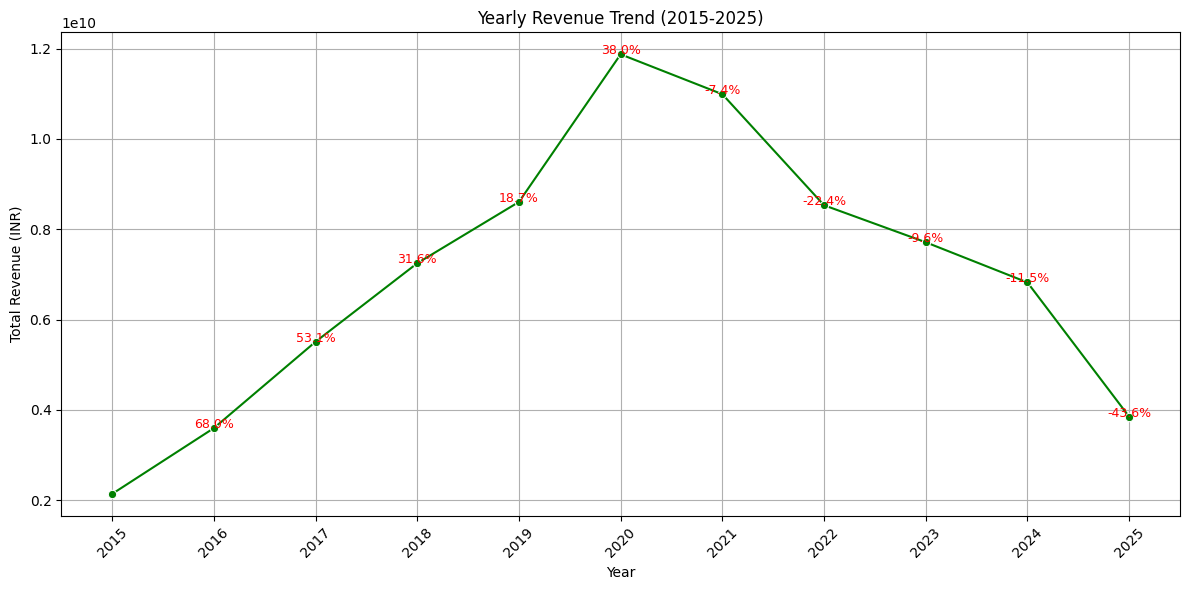

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# revenue by year
yearly_revenue = df.groupby('order_year')['final_amount_inr'].sum().reset_index()

#  percentage growth
yearly_revenue['pct_growth'] = yearly_revenue['final_amount_inr'].pct_change() * 100


plt.figure(figsize=(12, 6))


sns.lineplot(data=yearly_revenue, x='order_year', y='final_amount_inr', marker='o',color="green")
plt.title("Yearly Revenue Trend (2015-2025)")
plt.xlabel("Year")
plt.ylabel("Total Revenue (INR)")

#  growth
for i in range(1, len(yearly_revenue)):
    year = yearly_revenue.loc[i, 'order_year']
    growth = yearly_revenue.loc[i, 'pct_growth']
    plt.text(year, yearly_revenue.loc[i, 'final_amount_inr'], f"{growth:.1f}%", 
             color="red", fontsize=9, ha="center")


plt.grid(True)
plt.xticks(yearly_revenue['order_year'],rotation= 45)
plt.tight_layout()


plt.show()


Question 2
Analyze seasonal patterns in sales data. Create monthly sales heatmaps and identify peak selling months. Compare seasonal trends across different years and categories.


In [75]:
monthly_sales=df.groupby(["order_month","order_year"])['final_amount_inr'].sum().reset_index()
monthly_sales

,order_month,order_year,final_amount_inr
0,1,2015,1.631200e+08
1,1,2016,2.699567e+08
2,1,2017,4.123674e+08
3,1,2018,5.415665e+08
4,1,2019,6.606865e+08
...,...,...,...
127,12,2021,1.471467e+09
128,12,2022,1.138686e+09
129,12,2023,1.043083e+09
130,12,2024,9.238309e+08


In [76]:
heatmap_data = monthly_sales.pivot(index='order_year', columns='order_month', values='final_amount_inr')
heatmap_data

order_month,1,2,3,4,5,6,7,8,9,10,11,12
order_year,,,,,,,,,,,,
2015,1.631200e+08,1.443615e+08,1.452314e+08,1.780212e+08,1.568690e+08,1.396695e+08,1.557225e+08,1.709694e+08,1.713277e+08,2.114995e+08,2.330025e+08,2.723693e+08
2016,2.699567e+08,2.458046e+08,2.440493e+08,2.879859e+08,2.737611e+08,2.381541e+08,2.620680e+08,3.028037e+08,2.970093e+08,3.515652e+08,3.745717e+08,4.505861e+08
2017,4.123674e+08,3.750642e+08,3.711410e+08,4.587136e+08,4.224304e+08,3.639947e+08,3.973425e+08,4.511676e+08,4.444676e+08,5.357464e+08,5.846943e+08,6.928960e+08
2018,5.415665e+08,4.864787e+08,4.794365e+08,6.070537e+08,5.505224e+08,4.733500e+08,5.441288e+08,5.963954e+08,5.757199e+08,7.146628e+08,7.731800e+08,9.060502e+08
2019,6.606865e+08,5.632747e+08,5.908953e+08,7.086215e+08,6.435234e+08,5.801161e+08,6.300419e+08,7.111369e+08,6.892944e+08,8.377219e+08,9.231033e+08,1.067485e+09
2020,1.013018e+09,9.145839e+08,7.964934e+08,9.863922e+08,8.836448e+08,7.865501e+08,8.759377e+08,9.685912e+08,9.465505e+08,9.684953e+08,1.147016e+09,1.585921e+09
2021,9.420155e+08,8.488149e+08,7.476104e+08,8.989659e+08,8.332825e+08,7.182576e+08,8.067566e+08,8.848893e+08,8.752497e+08,9.045996e+08,1.058301e+09,1.471467e+09
2022,7.238991e+08,6.583461e+08,5.750871e+08,6.918650e+08,6.390212e+08,5.535118e+08,6.283987e+08,7.066822e+08,6.889096e+08,7.032162e+08,8.246892e+08,1.138686e+09
2023,6.508698e+08,5.865014e+08,5.104242e+08,6.381400e+08,5.764985e+08,5.014123e+08,5.626785e+08,6.366863e+08,6.247405e+08,6.285384e+08,7.534260e+08,1.043083e+09


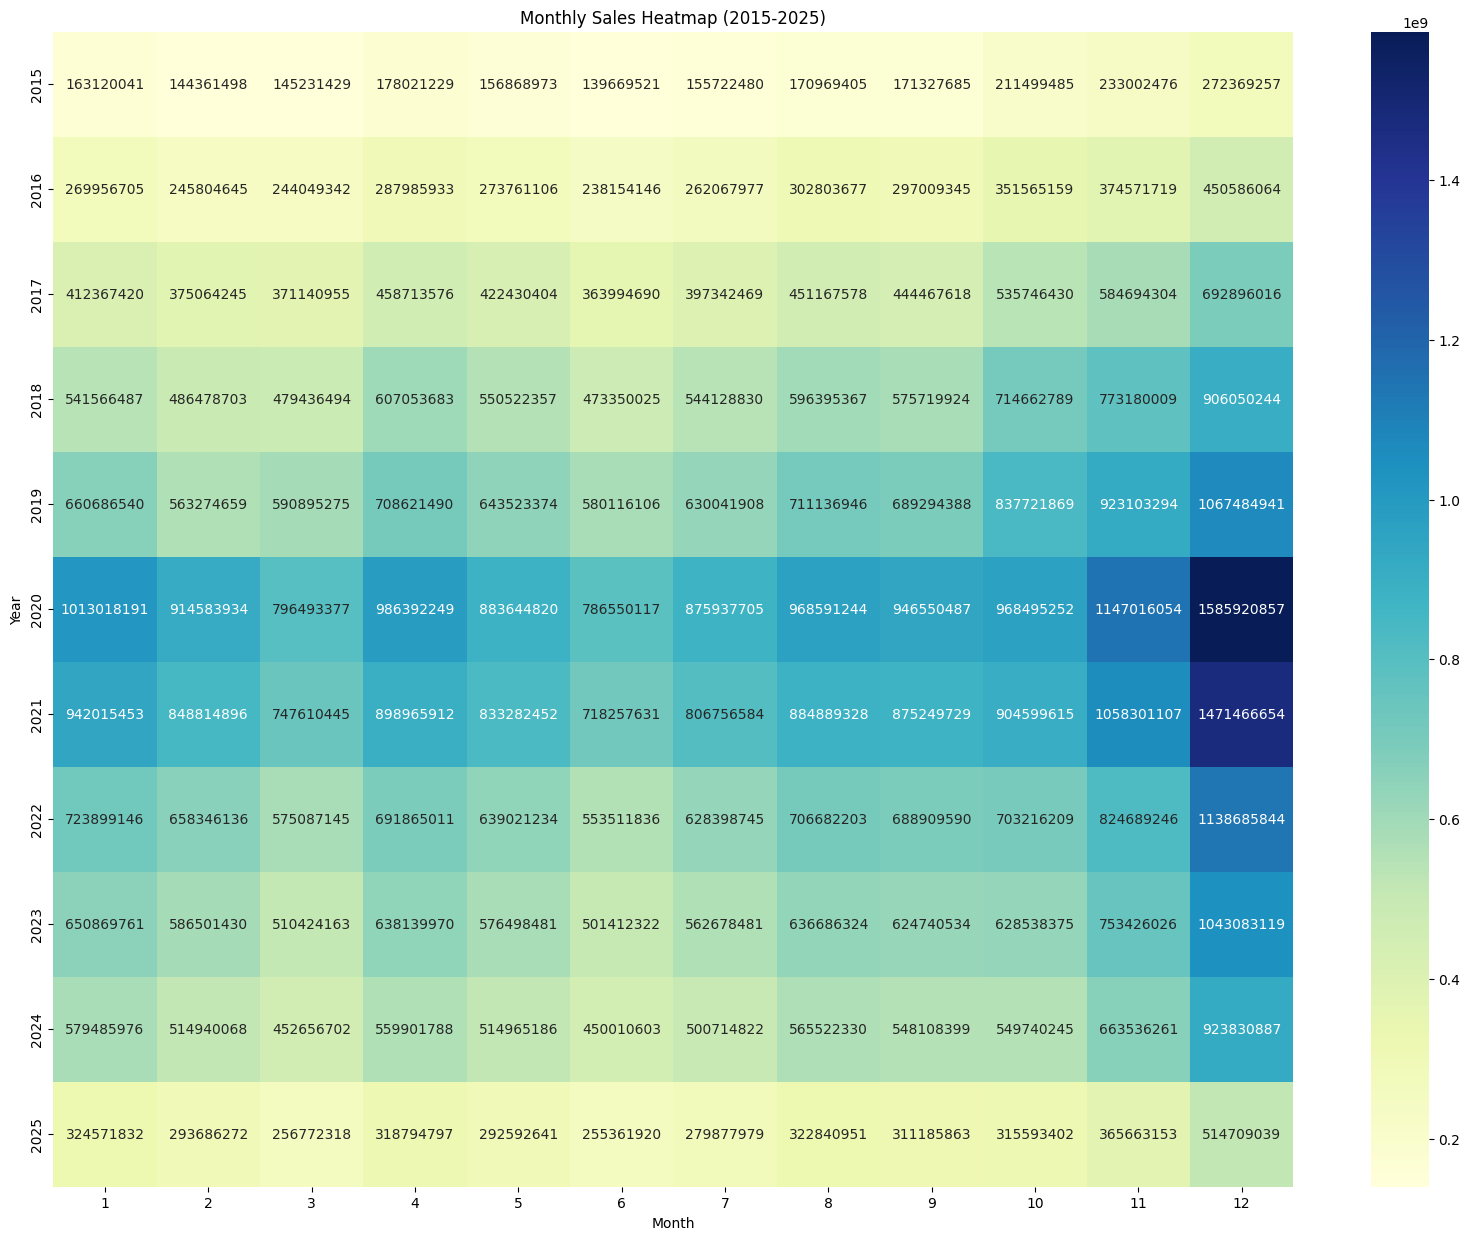

In [77]:
monthly_sales=df.groupby(["order_month","order_year"])['final_amount_inr'].sum().reset_index()



heatmap_data = monthly_sales.pivot(index='order_year', columns='order_month', values='final_amount_inr')

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Monthly Sales Heatmap (2015-2025)")
plt.xlabel("Month")
plt.ylabel("Year")

plt.show()

Question 3
Build a customer segmentation analysis using RFM (Recency, Frequency, Monetary) methodology. Create scatter plots and segment customers into meaningful groups with actionable insights.


Question 4
Visualize the evolution of payment methods from 2015-2025. Show the rise of UPI, decline of COD, and create stacked area charts to demonstrate market share changes over time.


In [78]:
payment_rise=df.groupby(["payment_method","order_year"])['final_amount_inr'].sum().reset_index()
payment_rise

,payment_method,order_year,final_amount_inr
0,BNPL,2022,1.706602e+08
1,BNPL,2023,3.146281e+08
2,BNPL,2024,4.028244e+08
3,BNPL,2025,2.605692e+08
4,COD,2015,1.609061e+09
...,...,...,...
59,Wallet,2021,5.437989e+08
60,Wallet,2022,3.388824e+08
61,Wallet,2023,2.350935e+08
62,Wallet,2024,1.317454e+08


In [79]:
payment_pivot = payment_rise.pivot(index='order_year', columns='payment_method', values='final_amount_inr').fillna(0)
payment_pivot

payment_method,BNPL,COD,Credit Card,Debit Card,Net Banking,UPI,Wallet
order_year,,,,,,,
2015,0.000000e+00,1.609061e+09,2.622328e+08,1.652502e+08,1.056192e+08,0.000000e+00,0.000000e+00
2016,0.000000e+00,2.512673e+09,5.170049e+08,3.586821e+08,1.357163e+08,7.423914e+07,0.000000e+00
2017,0.000000e+00,3.312505e+09,8.832806e+08,6.567932e+08,2.750707e+08,3.823763e+08,0.000000e+00
2018,0.000000e+00,3.617422e+09,1.238354e+09,1.009974e+09,4.401640e+08,9.426308e+08,0.000000e+00
2019,0.000000e+00,3.444333e+09,1.459851e+09,1.360240e+09,5.925476e+08,1.748930e+09,0.000000e+00
2020,0.000000e+00,2.953775e+09,2.154569e+09,2.010591e+09,9.562042e+08,3.559065e+09,2.389897e+08
2021,0.000000e+00,1.989133e+09,1.762285e+09,1.542587e+09,7.659446e+08,4.386461e+09,5.437989e+08
2022,1.706602e+08,1.285381e+09,1.266794e+09,1.025695e+09,5.247612e+08,3.920139e+09,3.388824e+08
2023,3.146281e+08,9.218876e+08,1.082076e+09,7.634399e+08,3.792655e+08,4.016608e+09,2.350935e+08


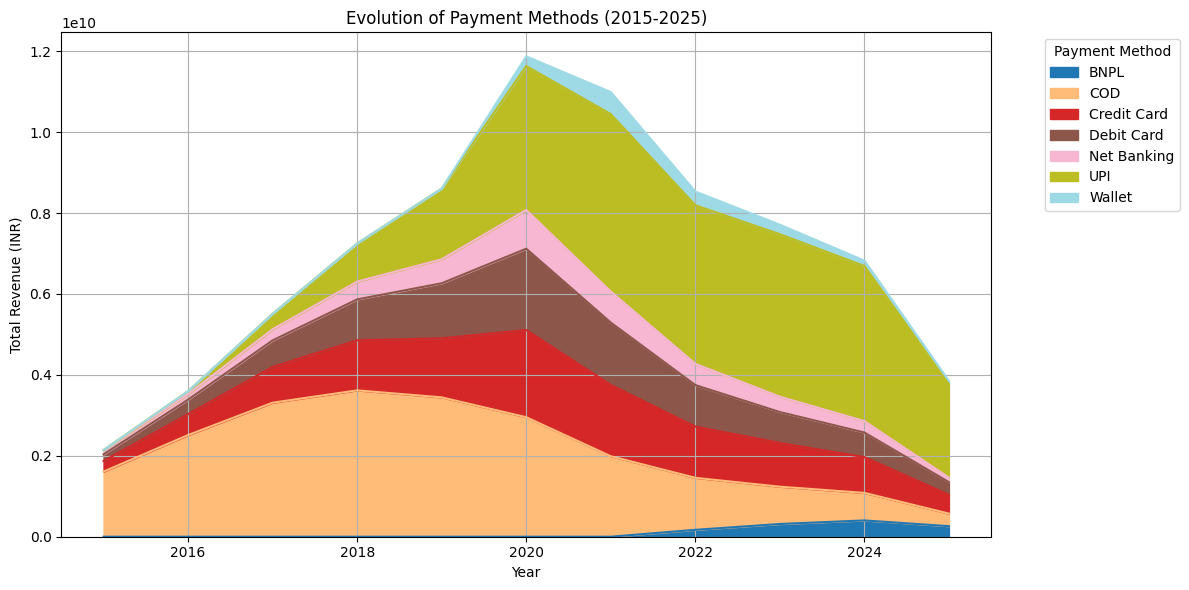

In [80]:
# grouping the payment and order year
payment_rise=df.groupby(["payment_method","order_year"])['final_amount_inr'].sum().reset_index()

#pivoting order year and payment method
payment_pivot = payment_rise.pivot(index='order_year', columns='payment_method', values='final_amount_inr').fillna(0)


payment_pivot.plot(kind='area', stacked=True, figsize=(12, 6), cmap='tab20')

plt.title("Evolution of Payment Methods (2015-2025)")
plt.xlabel("Year")
plt.ylabel("Total Revenue (INR)")
plt.legend(title="Payment Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Question 5
Perform category-wise performance analysis. Create treemaps, bar charts, and pie charts showing revenue contribution, growth rates, and market share for each product category.


In [81]:
category_wise_sales=df.groupby("subcategory")["final_amount_inr"].sum().reset_index()
category_wise_sales

,subcategory,final_amount_inr
0,Audio,1.111227e+09
1,Laptops,9.404032e+09
2,Smart Watch,3.215059e+09
3,Smartphones,5.615210e+10
4,TV & Entertainment,1.923418e+09
5,Tablets,5.082893e+09


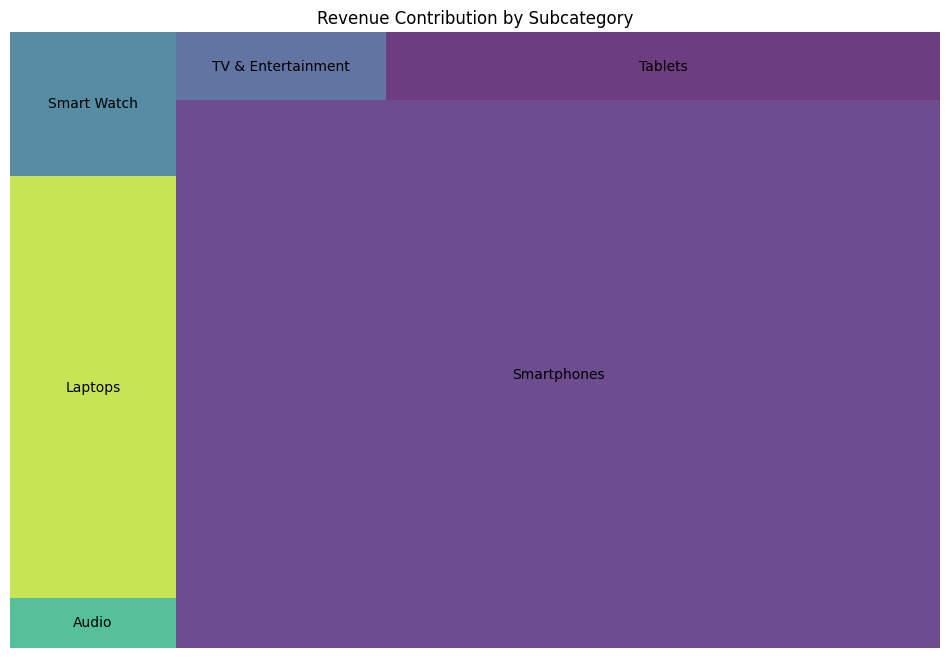

In [82]:
import squarify
category_wise_sales=df.groupby("subcategory")["final_amount_inr"].sum().reset_index()


plt.figure(figsize=(12, 8))
squarify.plot(sizes=category_wise_sales['final_amount_inr'], 
              label=category_wise_sales['subcategory'], 
              alpha=0.8)
plt.axis('off')
plt.title("Revenue Contribution by Subcategory")
plt.show()

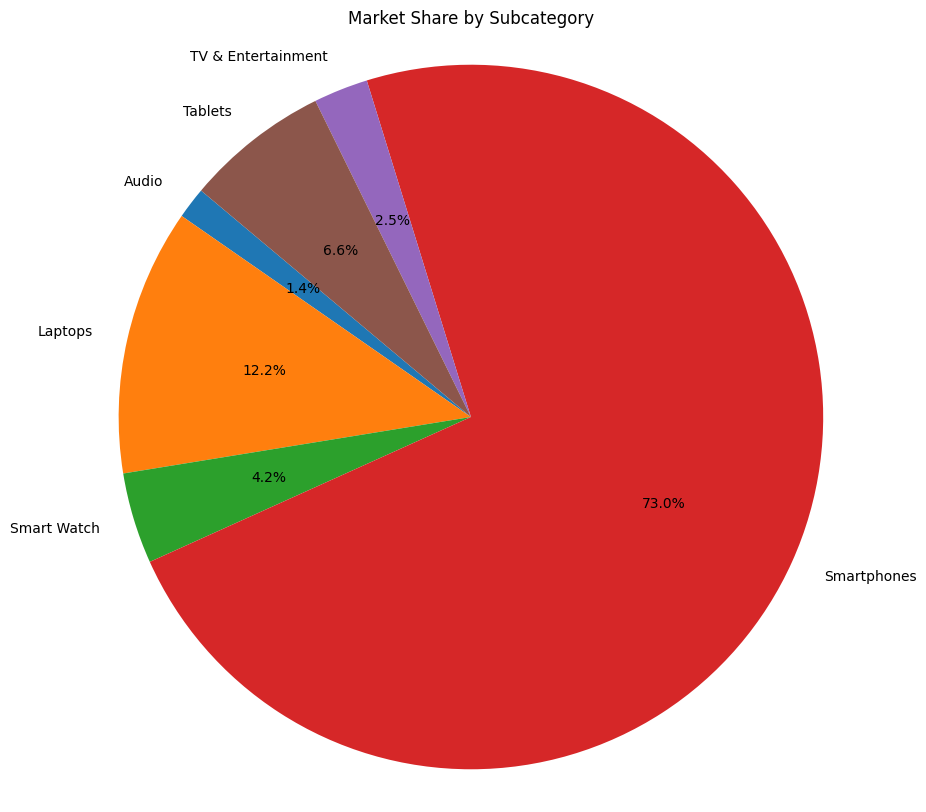

In [83]:
plt.figure(figsize=(10, 10))
plt.pie(category_wise_sales['final_amount_inr'], 
        labels=category_wise_sales['subcategory'], 
        autopct='%1.1f%%', startangle=140)
plt.title("Market Share by Subcategory")
plt.axis('equal')  
plt.show()


Question 6
Analyze Prime membership impact on customer behavior. Compare average order values, order frequency, and category preferences between Prime and non-Prime customers using multiple visualization types.


In [84]:
prime = df[df["is_prime_member"] == True]
non_prime = df[df["is_prime_member"] == False]


In [85]:
aov = df.groupby("is_prime_member")["final_amount_inr"].mean().reset_index()
aov

,is_prime_member,final_amount_inr
0,False,62034.145333
1,True,78203.059163


C:\Users\offic\AppData\Local\Temp\ipykernel_8760\1018098649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aov, x="is_prime_member", y="final_amount_inr", palette="pastel")


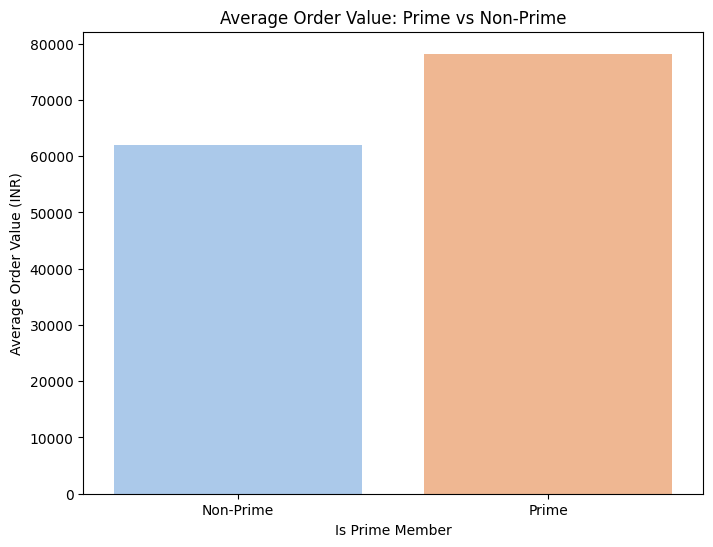

In [86]:
#  average order value per customer type
aov = df.groupby("is_prime_member")["final_amount_inr"].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(data=aov, x="is_prime_member", y="final_amount_inr", palette="pastel")
plt.title("Average Order Value: Prime vs Non-Prime")
plt.xlabel("Is Prime Member")
plt.ylabel("Average Order Value (INR)")
plt.xticks([0, 1], ["Non-Prime", "Prime"])
plt.show()


C:\Users\offic\AppData\Local\Temp\ipykernel_8760\3789946288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_freq, x="is_prime_member", y="transaction_id", palette="muted")


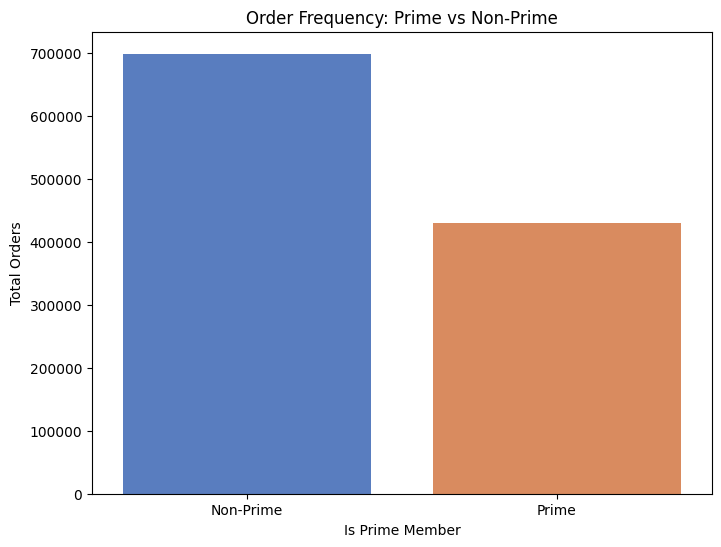

In [87]:
#  total orders per customer type
order_freq = df.groupby("is_prime_member")["transaction_id"].count().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=order_freq, x="is_prime_member", y="transaction_id", palette="muted")
plt.title("Order Frequency: Prime vs Non-Prime")
plt.xlabel("Is Prime Member")
plt.ylabel("Total Orders")
plt.xticks([0, 1], ["Non-Prime", "Prime"])
plt.show()


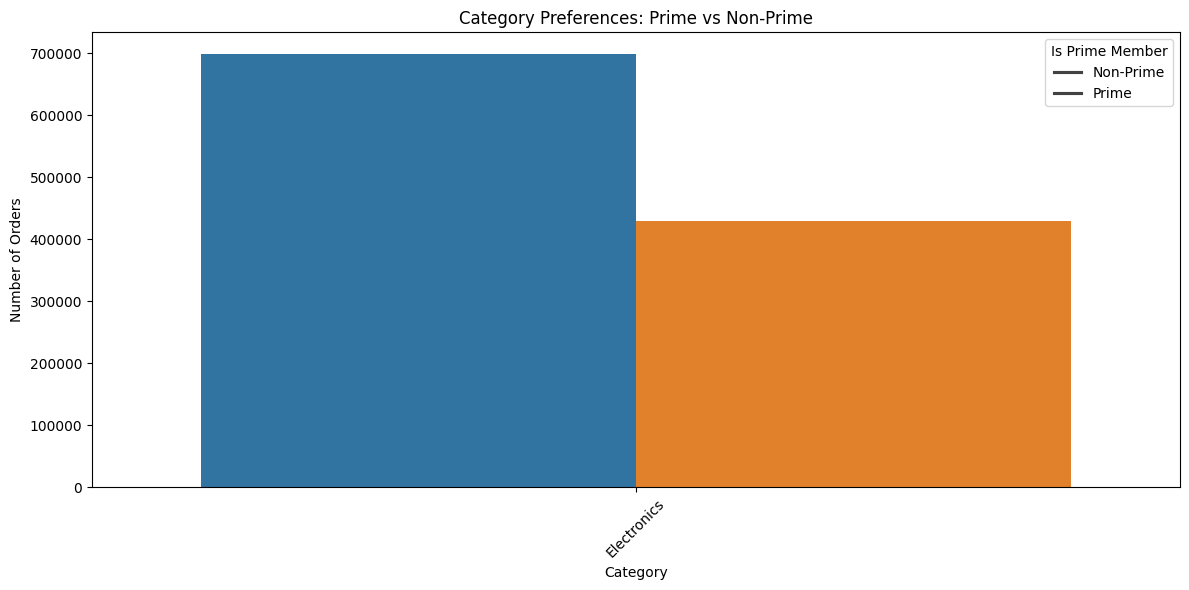

In [88]:
#  orders by category for each customer type
category_pref = df.groupby(["is_prime_member", "category"])["transaction_id"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_pref, x="category", y="transaction_id", hue="is_prime_member")
plt.title("Category Preferences: Prime vs Non-Prime")
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.legend(title="Is Prime Member", labels=["Non-Prime", "Prime"])
plt.tight_layout()
plt.show()


Question 7
Create geographic analysis of sales performance across Indian cities and states. Build choropleth maps and bar charts showing revenue density and growth patterns by tier (Metro/Tier1/Tier2/Rural).


In [89]:
city_sales=df.groupby("customer_city")["final_amount_inr"].sum().reset_index()
city_sales

,customer_city,final_amount_inr
0,Ahmedabad,3.300497e+09
1,Aligarh,2.965608e+08
2,Allahabad,2.766729e+08
3,Bareilly,3.096464e+08
4,Bengaluru,7.680945e+09
5,Bhubaneswar,1.159308e+09
6,Chandigarh,1.107560e+09
7,Chennai,6.416784e+09
8,Coimbatore,1.506970e+09
9,Delhi,9.282344e+09


In [90]:
state_sales = df.groupby("customer_state")["final_amount_inr"].sum().reset_index()
state_sales

,customer_state,final_amount_inr
0,Andhra Pradesh,1.260290e+09
1,Bihar,1.191981e+09
2,Delhi,9.282344e+09
3,Gujarat,7.183017e+09
4,Karnataka,7.680945e+09
5,Kerala,1.429728e+09
6,Madhya Pradesh,2.214093e+09
7,Maharashtra,1.755014e+10
8,Odisha,1.159308e+09
9,Punjab,2.185799e+09


In [91]:

city_tier_sales=df.groupby("customer_tier")["final_amount_inr"].sum().reset_index()
city_tier_sales

,customer_tier,final_amount_inr
0,Metro,4.242541e+10
1,Rural,2.323583e+09
2,Tier1,2.218988e+10
3,Tier2,9.949852e+09


C:\Users\offic\AppData\Local\Temp\ipykernel_8760\3831417905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_tier_sales, x="final_amount_inr", y="customer_tier", palette="viridis")


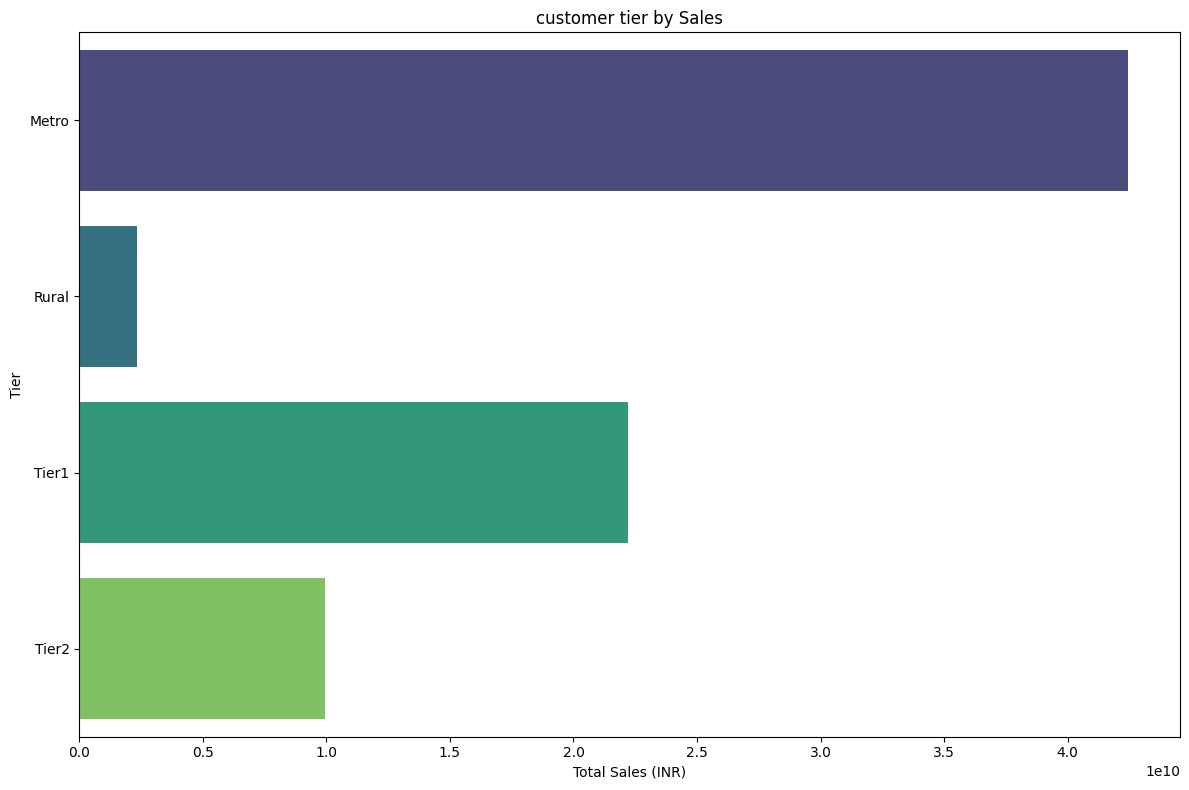

In [92]:
city_tier_sales=df.groupby("customer_tier")["final_amount_inr"].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=city_tier_sales, x="final_amount_inr", y="customer_tier", palette="viridis")
plt.title("customer tier by Sales")
plt.xlabel("Total Sales (INR)")
plt.ylabel("Tier")
plt.tight_layout()
plt.show()

C:\Users\offic\AppData\Local\Temp\ipykernel_8760\3836954302.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x="final_amount_inr", y="customer_city", palette="viridis")


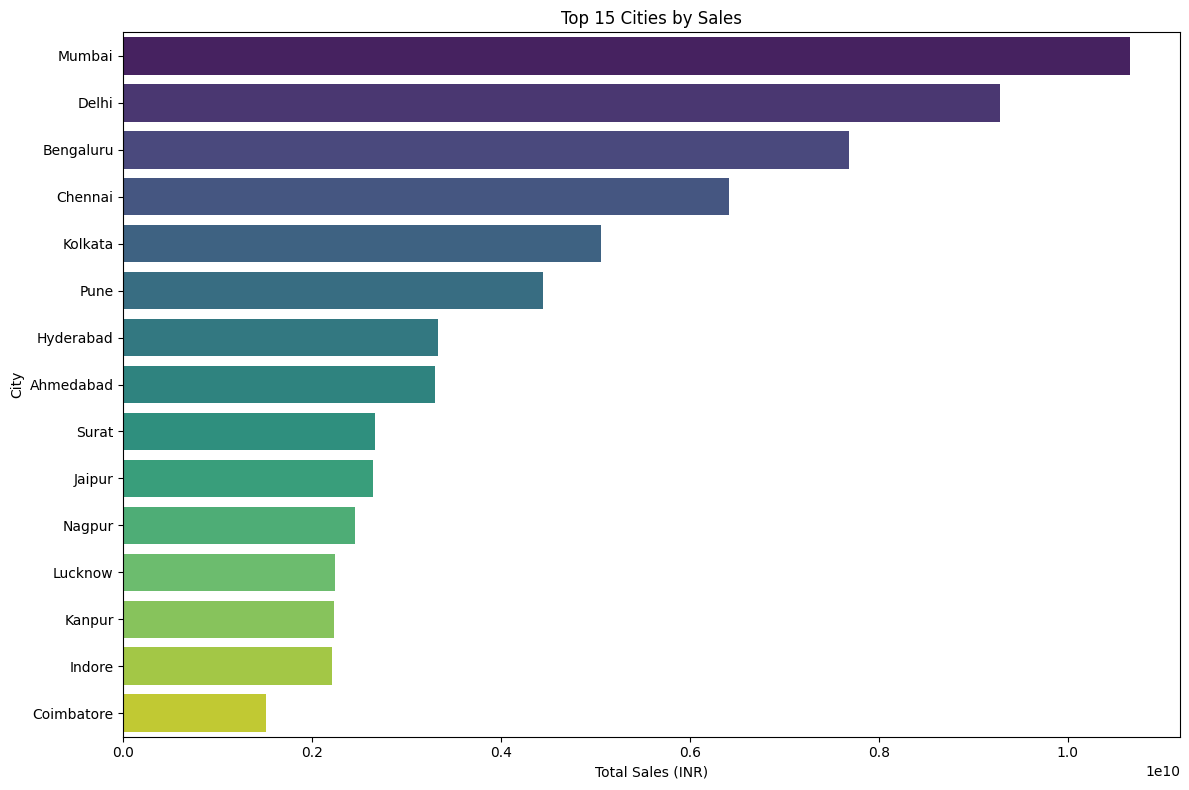

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

city_sales=df.groupby("customer_city")["final_amount_inr"].sum().reset_index()


#  top 15 cities by sales
top_cities = city_sales.sort_values(by="final_amount_inr", ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_cities, x="final_amount_inr", y="customer_city", palette="viridis")
plt.title("Top 15 Cities by Sales")
plt.xlabel("Total Sales (INR)")
plt.ylabel("City")
plt.tight_layout()
plt.show()


C:\Users\offic\AppData\Local\Temp\ipykernel_8760\3098415025.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x="final_amount_inr", y="customer_state", palette="magma")


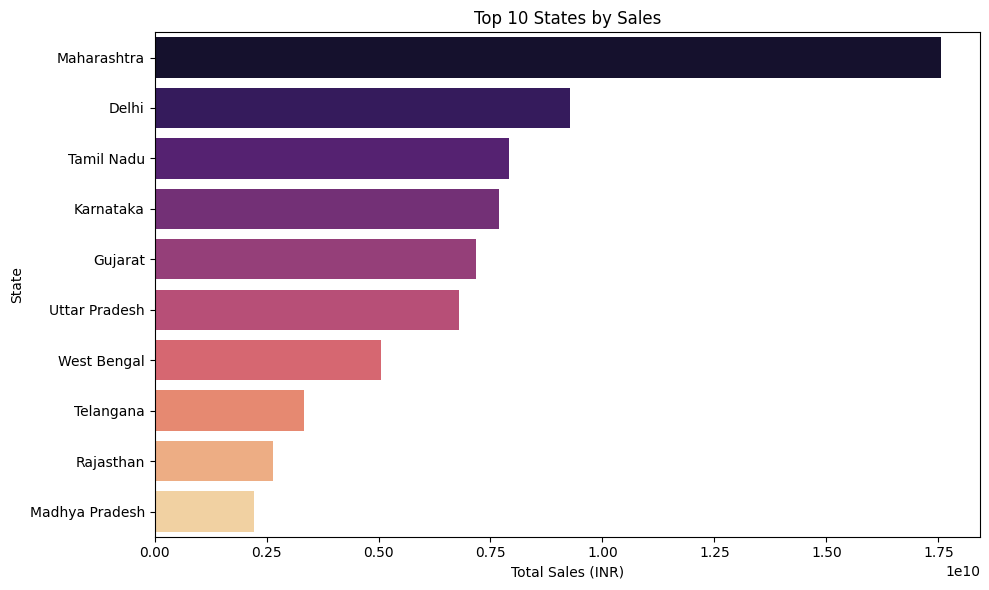

In [94]:
state_sales = df.groupby("customer_state")["final_amount_inr"].sum().reset_index()


# Plot top states by sales
top_states = state_sales.sort_values(by="final_amount_inr", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_states, x="final_amount_inr", y="customer_state", palette="magma")
plt.title("Top 10 States by Sales")
plt.xlabel("Total Sales (INR)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


In [95]:
import plotly.express as px

fig = px.choropleth(
    state_sales,
    locations="customer_state",
    locationmode="India states",  
    color="final_amount_inr",
    title="Sales Distribution by State",
    color_continuous_scale="Viridis"
)
fig.show()


ValueError: 
    Invalid value of type 'builtins.str' received for the 'locationmode' property of choropleth
        Received value: 'India states'

    The 'locationmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['ISO-3', 'USA-states', 'country names', 'geojson-id']

Question 8
Study festival sales impact using before/during/after analysis. Visualize revenue spikes during Diwali, Prime Day, and other festivals with detailed time series analysis.


In [96]:
df["festival_name"].unique()

array([nan, 'Summer Sale', 'Back to School', 'Diwali Sale',
       'Holi Festival', 'Amazon Great Indian Festival',
       'Republic Day Sale', 'Valentine Sale', 'Prime Day'], dtype=object)

In [97]:
festival_sales=df.groupby("festival_name")["final_amount_inr"].sum().reset_index()
festival_sales

,festival_name,final_amount_inr
0,Amazon Great Indian Festival,2.519912e+09
1,Back to School,4.072595e+09
2,Diwali Sale,3.958181e+09
3,Holi Festival,1.886839e+09
4,Prime Day,4.360842e+08
5,Republic Day Sale,9.602263e+08
6,Summer Sale,2.119236e+09
7,Valentine Sale,6.653183e+08


C:\Users\offic\AppData\Local\Temp\ipykernel_8760\999311063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sales, x="final_amount_inr", y="festival_name", palette="magma")


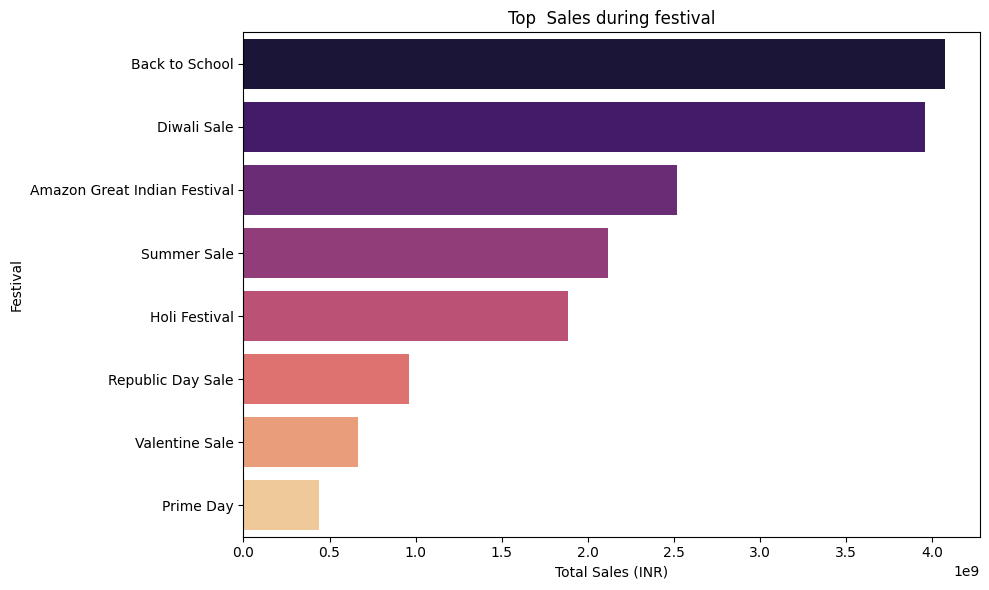

In [98]:
festival_sales=df.groupby("festival_name")["final_amount_inr"].sum().reset_index()

top_sales = festival_sales.sort_values(by="final_amount_inr", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_sales, x="final_amount_inr", y="festival_name", palette="magma")
plt.title("Top  Sales during festival")
plt.xlabel("Total Sales (INR)")
plt.ylabel("Festival")
plt.tight_layout()
plt.show()

Question 9
Analyze customer age group behavior and preferences. Create demographic analysis with category preferences, spending patterns, and shopping frequency across different age segments.


In [99]:
df["customer_age_group"].unique()

array(['36-45', '26-35', '46-55', '18-25', '55+'], dtype=object)

In [100]:
age_category = df.groupby(["customer_age_group", "category"])["final_amount_inr"].sum().reset_index()
age_category

,customer_age_group,category,final_amount_inr
0,18-25,Electronics,2.158446e+10
1,26-35,Electronics,3.299759e+10
2,36-45,Electronics,1.354666e+10
3,46-55,Electronics,6.738818e+09
4,55+,Electronics,2.021196e+09


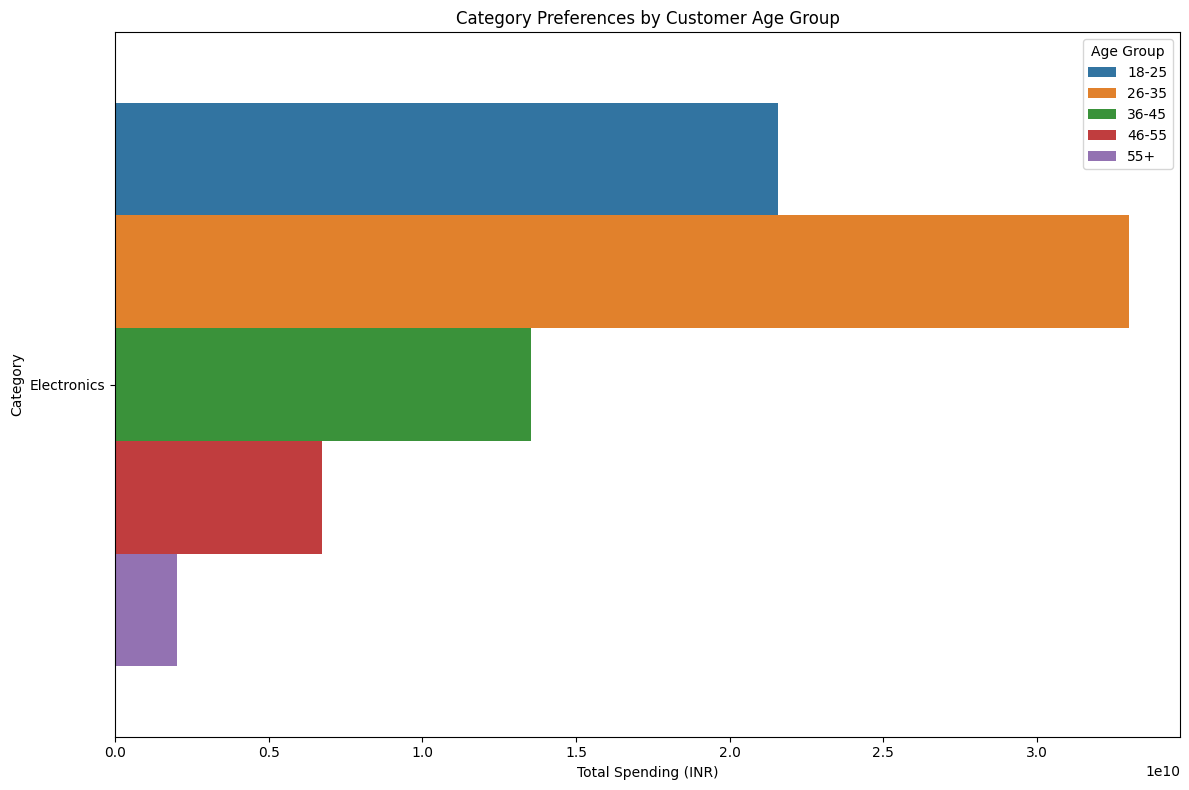

In [101]:
age_category = df.groupby(["customer_age_group", "category"])["final_amount_inr"].sum().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(data=age_category, x="final_amount_inr", y="category", hue="customer_age_group")
plt.title("Category Preferences by Customer Age Group")
plt.xlabel("Total Spending (INR)")
plt.ylabel("Category")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


C:\Users\offic\AppData\Local\Temp\ipykernel_8760\566458032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_spending, x="customer_age_group", y="final_amount_inr", palette="Blues_d")
C:\Users\offic\AppData\Local\Temp\ipykernel_8760\566458032.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_spending, x="customer_age_group", y="final_amount_inr", palette="Greens_d")


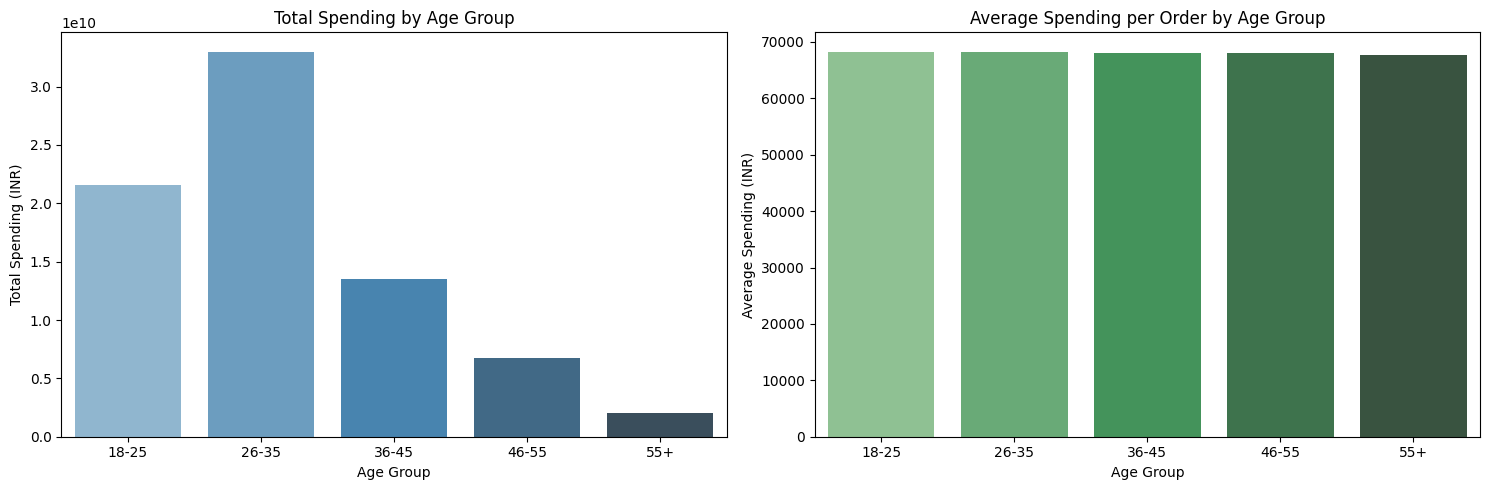

In [102]:
#  spending
age_spending = df.groupby("customer_age_group")["final_amount_inr"].sum().reset_index()
plt.figure(figsize = (15,5))


plt.subplot(121)
sns.barplot(data=age_spending, x="customer_age_group", y="final_amount_inr", palette="Blues_d")
plt.title("Total Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Spending (INR)")
plt.tight_layout()


# Average spending per order

plt.subplot(122)
avg_spending = df.groupby("customer_age_group")["final_amount_inr"].mean().reset_index()

sns.barplot(data=avg_spending, x="customer_age_group", y="final_amount_inr", palette="Greens_d")
plt.title("Average Spending per Order by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spending (INR)")
plt.tight_layout()


plt.show()


In [103]:
order_frequency = df.groupby("customer_age_group")["transaction_id"].nunique().reset_index()
order_frequency

,customer_age_group,transaction_id
0,18-25,316424
1,26-35,483214
2,36-45,199100
3,46-55,99012
4,55+,29859


C:\Users\offic\AppData\Local\Temp\ipykernel_8760\1045549567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_frequency, x="customer_age_group", y="transaction_id", palette="Oranges_d")


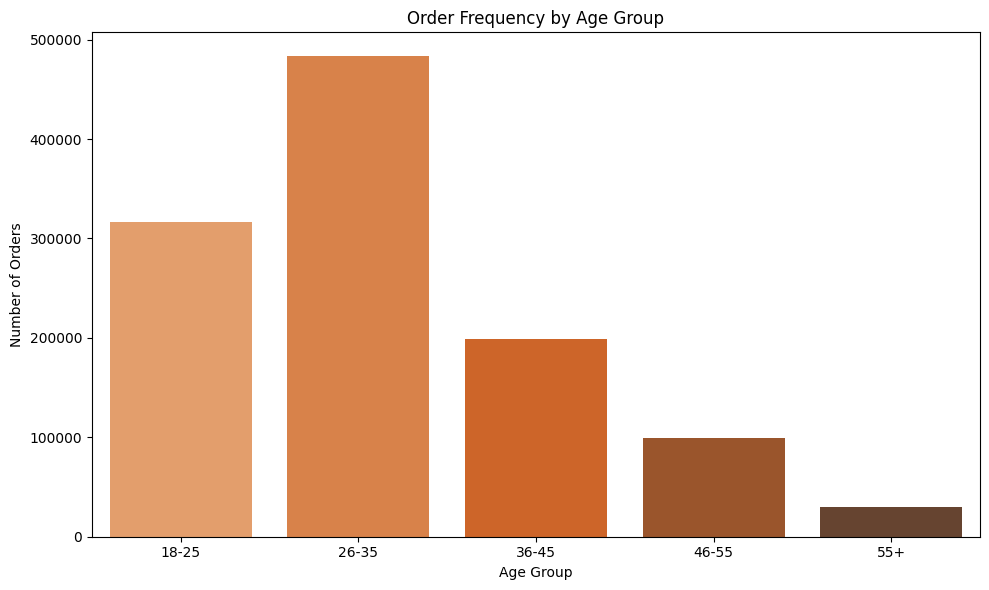

In [104]:
order_frequency = df.groupby("customer_age_group")["transaction_id"].nunique().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=order_frequency, x="customer_age_group", y="transaction_id", palette="Oranges_d")
plt.title("Order Frequency by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


Question 10
Build price vs demand analysis using scatter plots and correlation matrices. Analyze how pricing strategies affect sales volumes across different categories and customer segments.


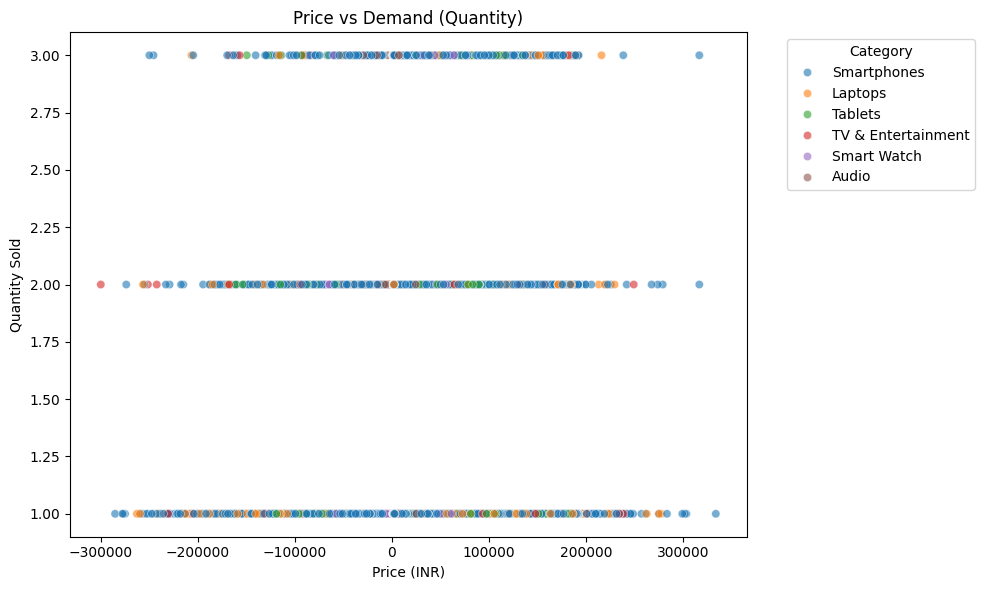

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x="corrected_price_inr", y="quantity", hue="subcategory", alpha=0.6)

plt.title("Price vs Demand (Quantity)")
plt.xlabel("Price (INR)")
plt.ylabel("Quantity Sold")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


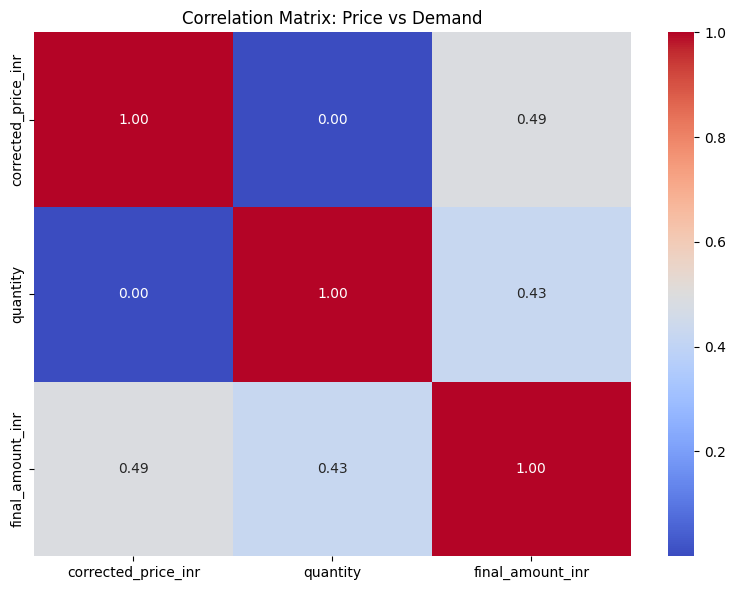

In [106]:
corr = df[["corrected_price_inr", "quantity", "final_amount_inr"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Price vs Demand")
plt.tight_layout()
plt.show()


Question 11
Create delivery performance analysis showing delivery days distribution, on-time performance, and customer satisfaction correlation with delivery speed across different cities and customer tiers.


In [107]:
df["delivery_type"].unique()

array(['Standard', 'Express', 'Same Day'], dtype=object)

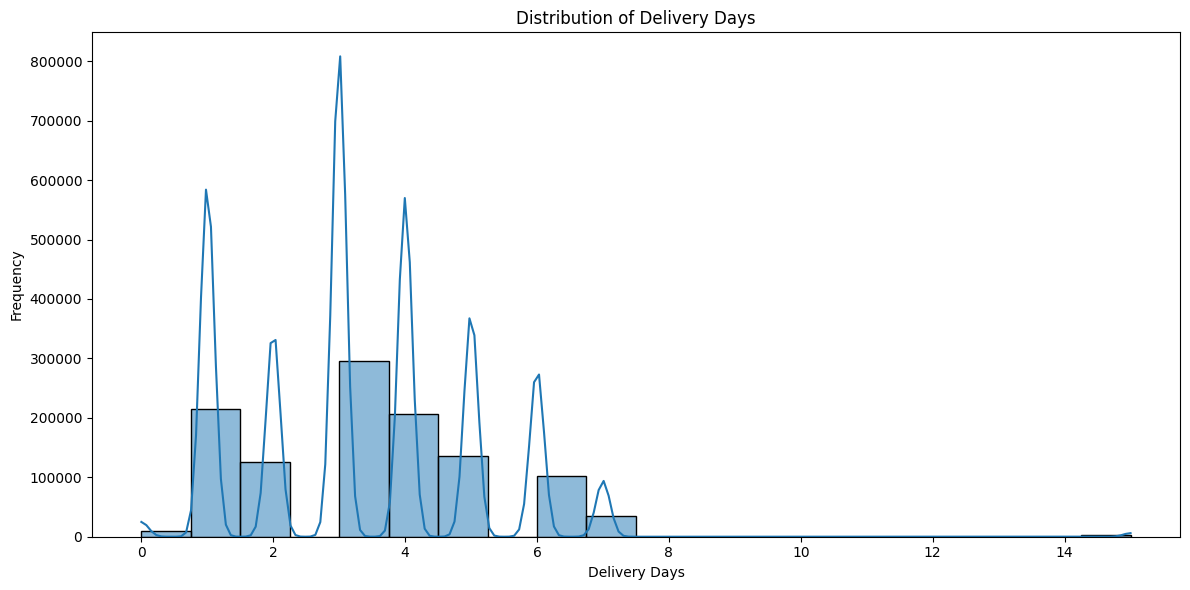

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.histplot(df['delivery_days'], bins=20, kde=True)
plt.title("Distribution of Delivery Days")
plt.xlabel("Delivery Days")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\offic\AppData\Local\Temp\ipykernel_8760\2835077938.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\offic\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


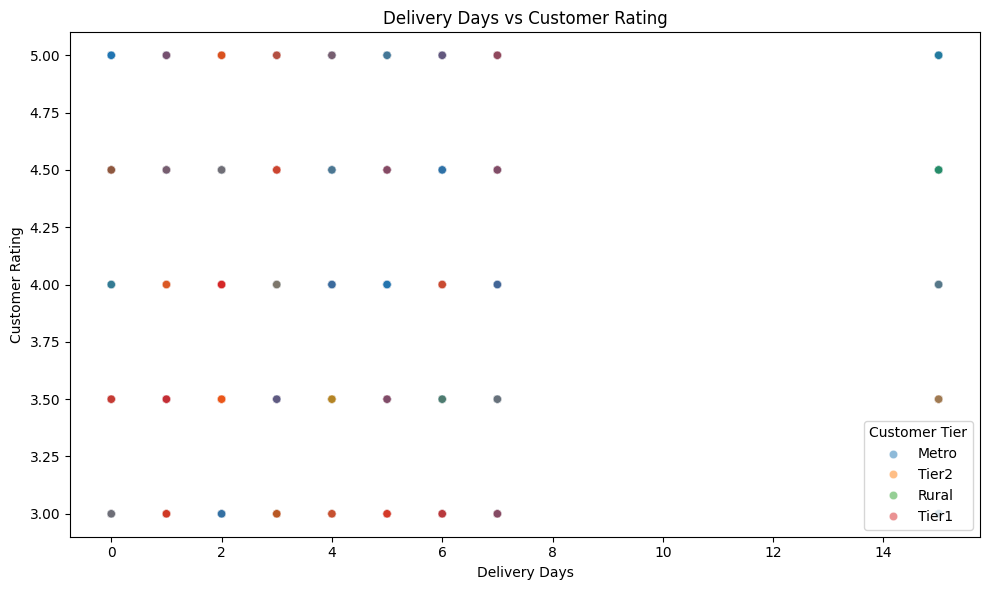

In [109]:
# customer satisfing

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='delivery_days', y='customer_rating', hue='customer_tier', alpha=0.5)
plt.title("Delivery Days vs Customer Rating")
plt.xlabel("Delivery Days")
plt.ylabel("Customer Rating")
plt.legend(title="Customer Tier")
plt.tight_layout()
plt.show()


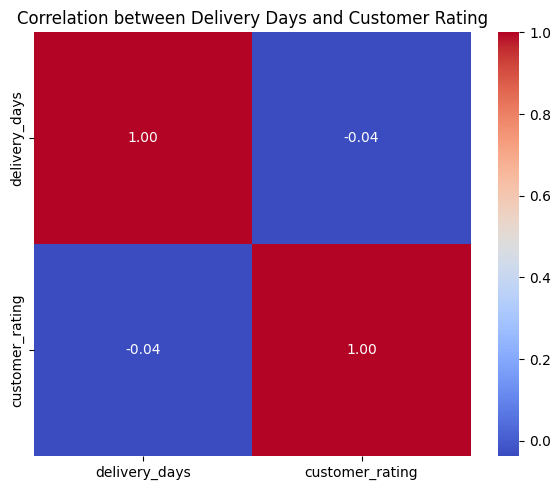

In [110]:
corr = df[['delivery_days', 'customer_rating']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Delivery Days and Customer Rating")
plt.tight_layout()
plt.show()


Question 12
Analyze return patterns and customer satisfaction using return rates, reasons, and correlation with product ratings, prices, and categories through multiple visualization techniques.


In [111]:
rating_orders = df.groupby('customer_rating')['return_status'].count().reset_index(name='total_orders')
rating_orders

,customer_rating,total_orders
0,3.0,46903
1,3.5,80157
2,4.0,198296
3,4.5,600401
4,5.0,201852


In [112]:
rating_orders = df.groupby('customer_rating')['return_status'].count().reset_index(name='total_orders')
rating_returns = df[df['return_status'] == 'Returned'].groupby('customer_rating')['return_status'].count().reset_index(name='returned_orders')
rating_returns

,customer_rating,returned_orders
0,3.0,3576
1,3.5,5937
2,4.0,14357
3,4.5,41955
4,5.0,13300


C:\Users\offic\AppData\Local\Temp\ipykernel_8760\1208055941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_returns, x="customer_rating", y="returned_orders", palette="magma")


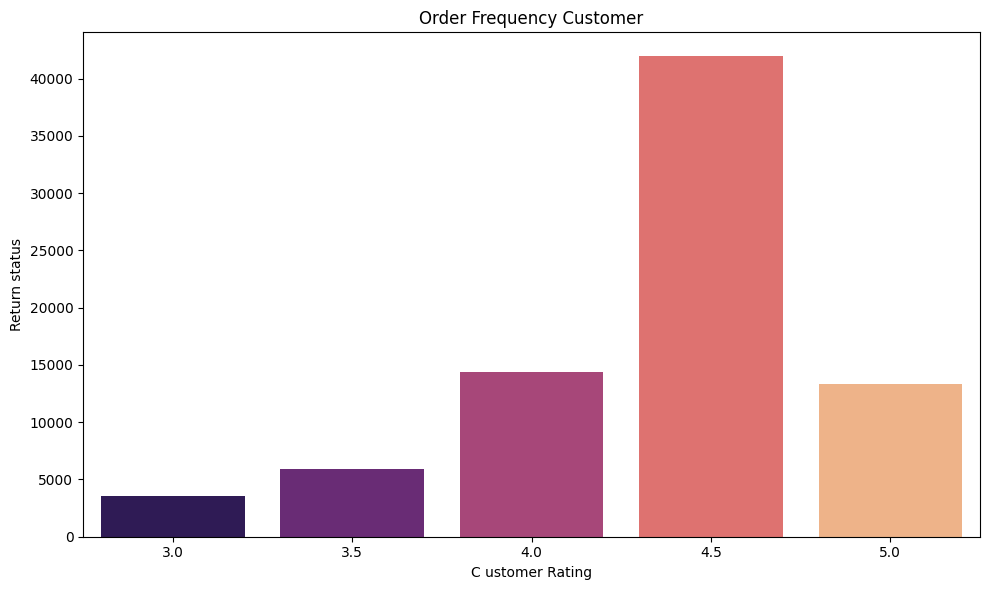

In [113]:


plt.figure(figsize=(10, 6))
sns.barplot(data=rating_returns, x="customer_rating", y="returned_orders", palette="magma")
plt.title("Order Frequency Customer")
plt.xlabel("C ustomer Rating")
plt.ylabel("Return status")
plt.tight_layout()
plt.show()

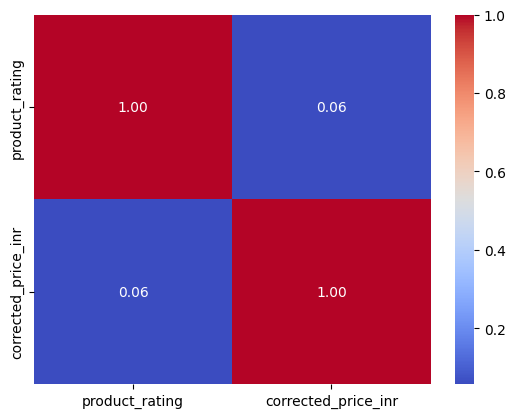

In [114]:
corr= df[["product_rating","corrected_price_inr"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


Question 13
Study brand performance and market share evolution. Create brand comparison charts, market share trends, and competitive positioning analysis across different categories.


In [115]:
brand_sales = df.groupby(["order_year", "brand"])["final_amount_inr"].sum().reset_index()
top_sales_brannd=brand_sales.sort_values(by="final_amount_inr",ascending=False).head(15)
top_sales_brannd

,order_year,brand,final_amount_inr
150,2020,Samsung,3.043497e+09
177,2021,Samsung,2.842003e+09
133,2020,Apple,2.507342e+09
160,2021,Apple,2.366688e+09
205,2022,Samsung,2.243440e+09
123,2019,Samsung,2.241925e+09
234,2023,Samsung,2.044825e+09
96,2018,Samsung,2.035166e+09
147,2020,OnePlus,1.872666e+09
187,2022,Apple,1.834803e+09


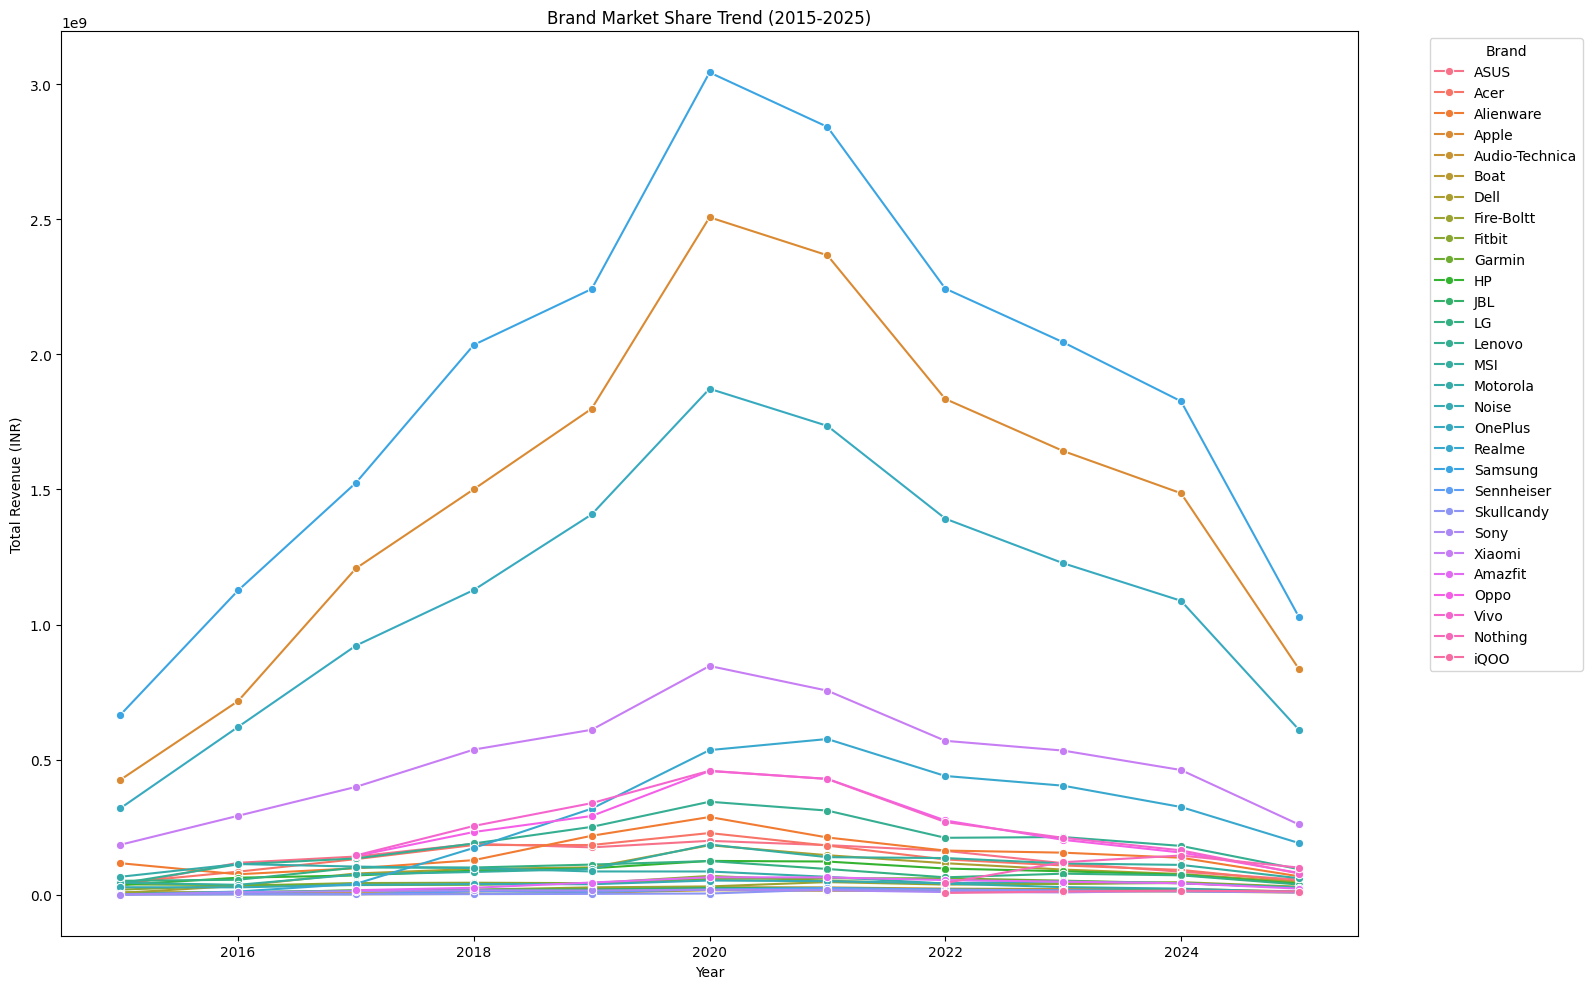

In [116]:
brand_sales = df.groupby(["order_year", "brand"])["final_amount_inr"].sum().reset_index()


plt.figure(figsize=(16, 10))
sns.lineplot(data=brand_sales, x='order_year', y='final_amount_inr', hue='brand', marker='o')
plt.title("Brand Market Share Trend (2015-2025)")
plt.xlabel("Year")
plt.ylabel("Total Revenue (INR)")
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



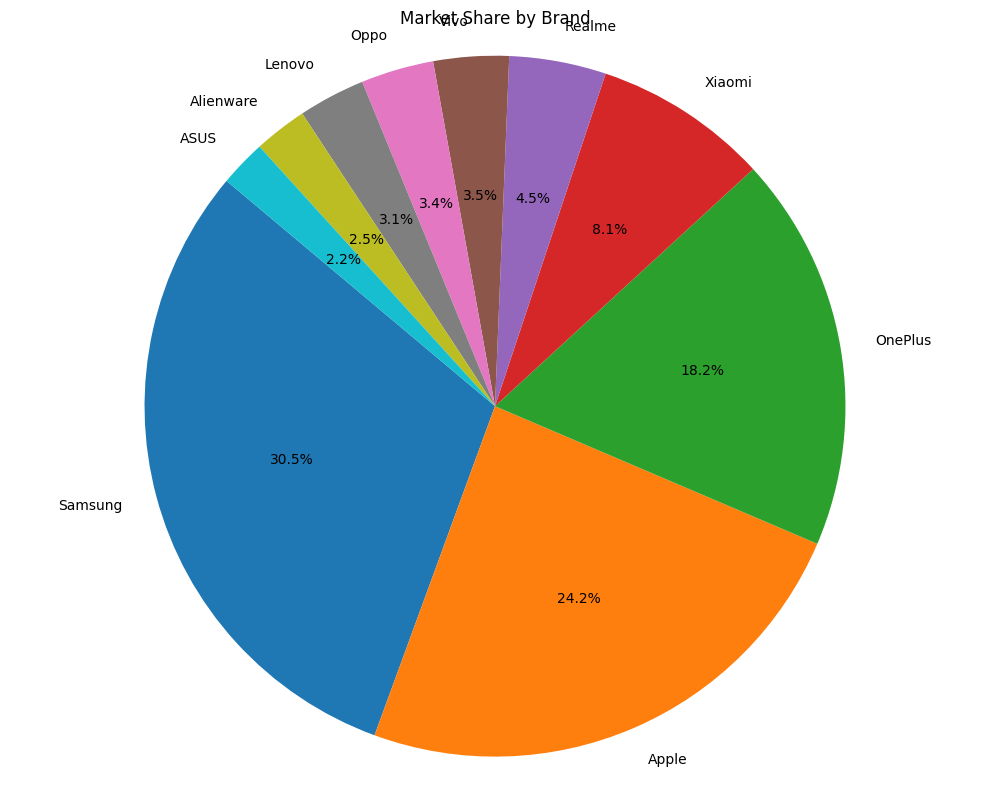

In [117]:
#pie chart
total_brand_sales = df.groupby("brand")["final_amount_inr"].sum().reset_index()
total_brand = total_brand_sales.sort_values(by="final_amount_inr",ascending=False).head(10)


plt.figure(figsize=(10, 8))
plt.pie(total_brand['final_amount_inr'], labels=total_brand['brand'], autopct='%1.1f%%', startangle=140)
plt.title("Market Share by Brand")
plt.axis('equal')
plt.tight_layout()
plt.show()


C:\Users\offic\AppData\Local\Temp\ipykernel_8760\418947707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_brand_sales, x='brand', y='final_amount_inr', palette='viridis')


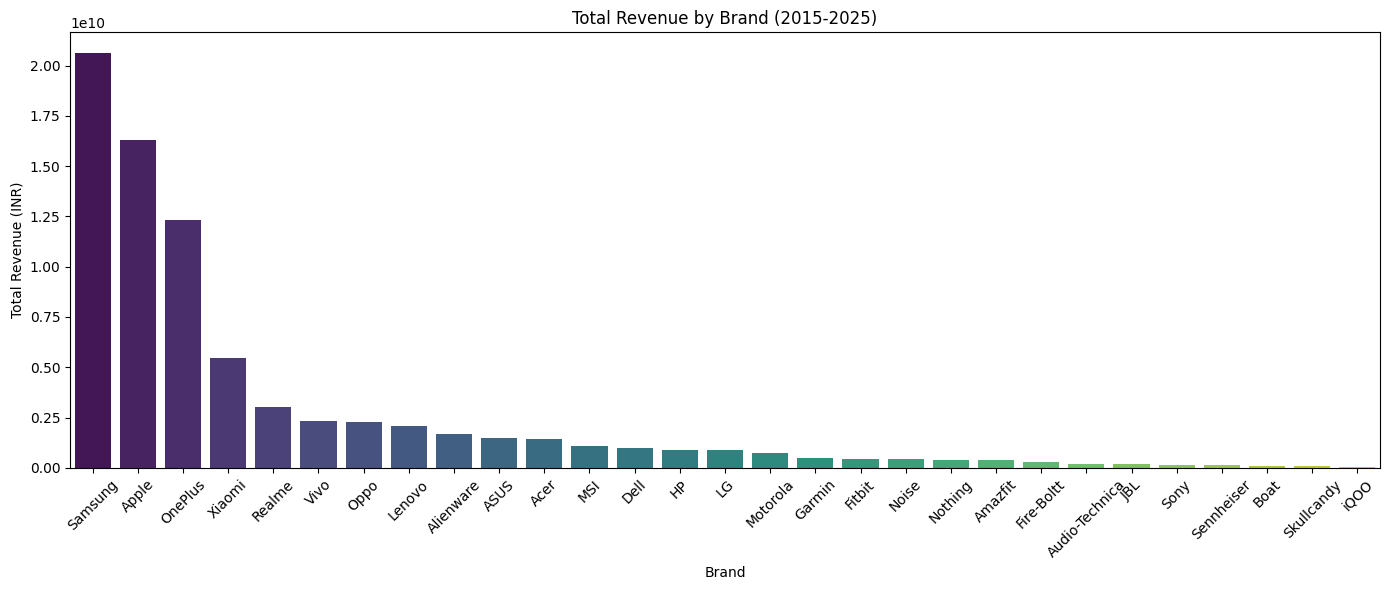

In [118]:
# bar chart
total_brand_sales = total_brand_sales.sort_values(by="final_amount_inr", ascending=False)


plt.figure(figsize=(14, 6))

sns.barplot(data=total_brand_sales, x='brand', y='final_amount_inr', palette='viridis')
plt.xticks(rotation=45)
plt.title("Total Revenue by Brand (2015-2025)")
plt.xlabel("Brand")
plt.ylabel("Total Revenue (INR)")
plt.tight_layout()
plt.show()


Question 14
Build customer lifetime value (CLV) analysis using cohort analysis, retention curves, and CLV distribution across different customer segments and acquisition years.


In [119]:
lifetime_sales_tier=df.groupby(["customer_tier","order_year"])['final_amount_inr'].sum().reset_index()


In [120]:
heatmap=lifetime_sales_tier.pivot(index="order_year",columns="customer_tier",values="final_amount_inr")
heatmap

customer_tier,Metro,Rural,Tier1,Tier2
order_year,,,,
2015,1.473602e+09,3.791422e+07,4.442721e+08,1.863752e+08
2016,2.436425e+09,7.375095e+07,7.663606e+08,3.217790e+08
2017,3.588948e+09,1.099330e+08,1.265193e+09,5.459516e+08
2018,4.507581e+09,1.445849e+08,1.824459e+09,7.719196e+08
2019,5.063360e+09,1.855193e+08,2.333036e+09,1.023985e+09
2020,6.647922e+09,3.118341e+08,3.403687e+09,1.509751e+09
2021,5.857210e+09,3.254567e+08,3.311291e+09,1.496252e+09
2022,4.285793e+09,3.014244e+08,2.736833e+09,1.208262e+09
2023,3.734606e+09,3.182913e+08,2.504750e+09,1.155352e+09


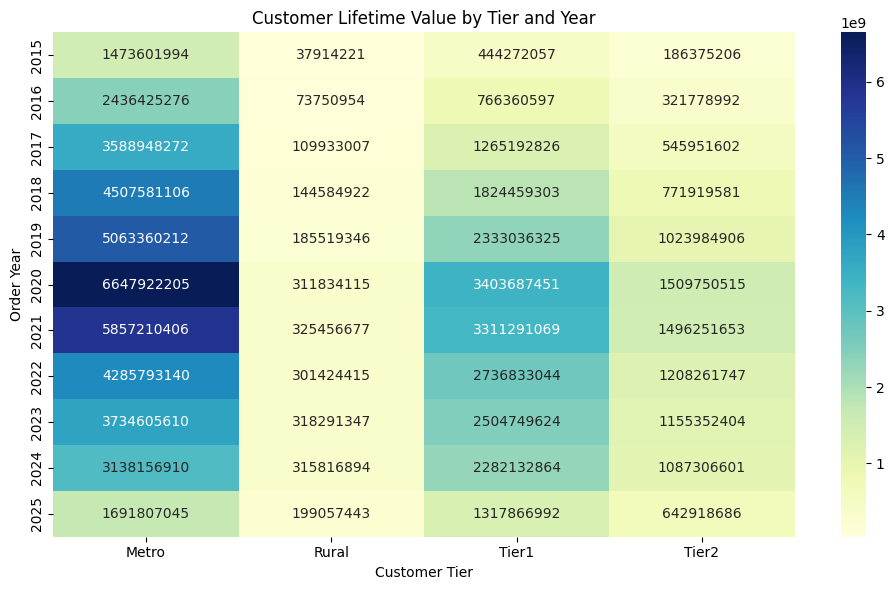

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Customer Lifetime Value by Tier and Year")
plt.xlabel("Customer Tier")
plt.ylabel("Order Year")
plt.tight_layout()
plt.show()


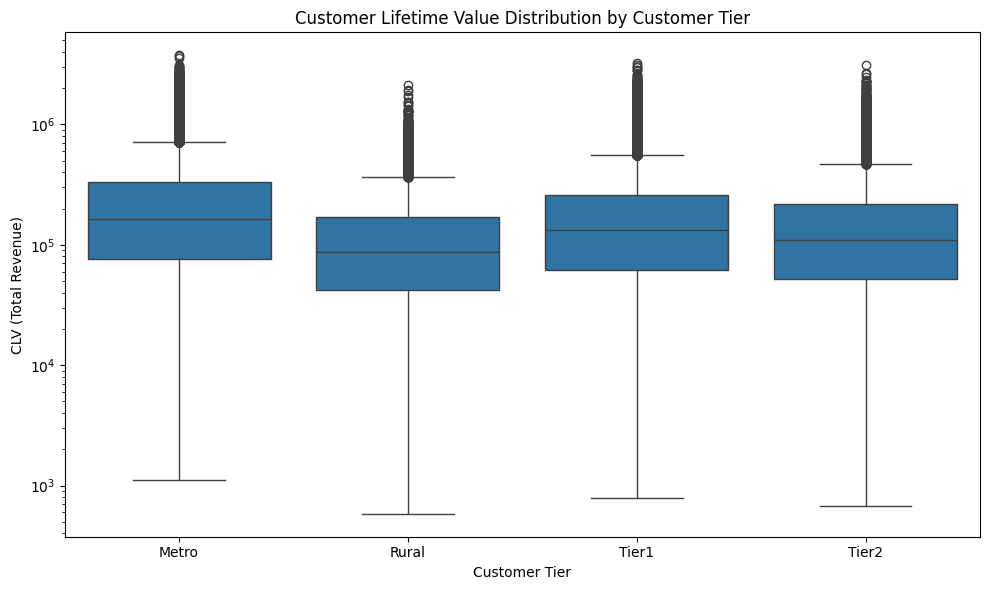

In [122]:

customer_clv = df.groupby('customer_id')['final_amount_inr'].sum().reset_index()


customer_info = df[['customer_id', 'customer_tier']].drop_duplicates()
customer_clv = customer_clv.merge(customer_info, on='customer_id', how='left')


plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_clv, x='customer_tier', y='final_amount_inr')
plt.title("Customer Lifetime Value Distribution by Customer Tier")
plt.xlabel("Customer Tier")
plt.ylabel("CLV (Total Revenue)")
plt.yscale('log')  
plt.tight_layout()
plt.show()


Question 15
Analyze discount and promotional effectiveness. Create discount impact analysis showing correlation between discount percentages, sales volumes, and revenue across categories and time periods.


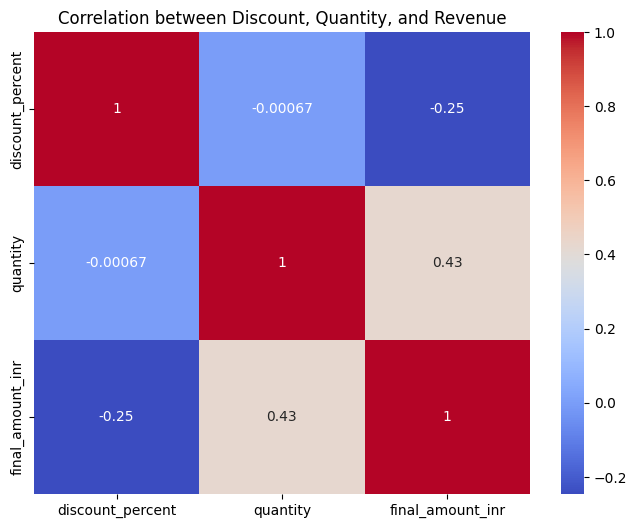

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = df[['discount_percent', 'quantity', 'final_amount_inr']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Discount, Quantity, and Revenue")
plt.show()


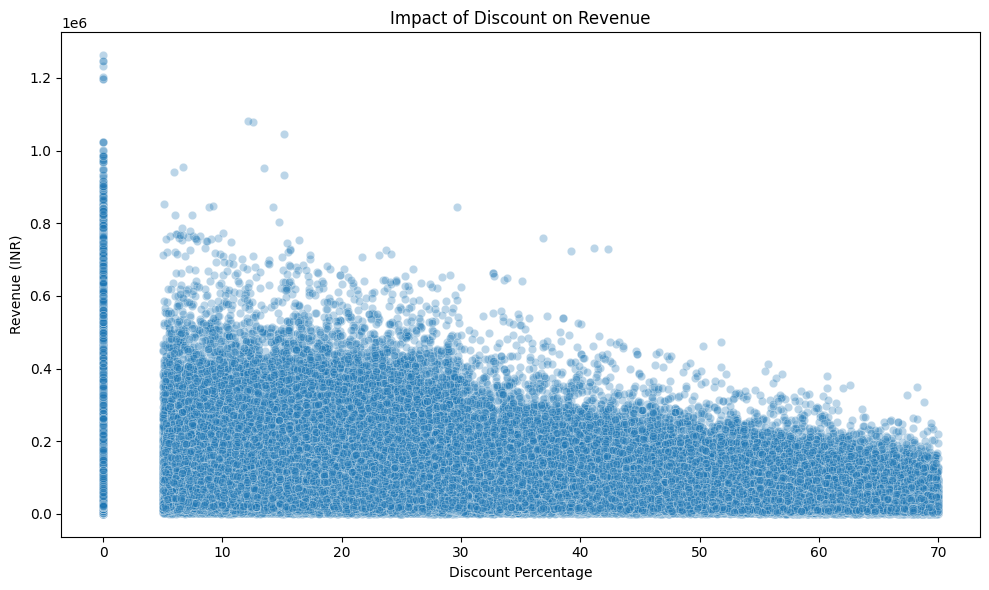

In [124]:
plt.figure(figsize=(10, 6))


sns.scatterplot(data=df, x='discount_percent', y='final_amount_inr', alpha=0.3)
plt.title("Impact of Discount on Revenue")
plt.xlabel("Discount Percentage")
plt.ylabel("Revenue (INR)")
plt.tight_layout()
plt.show()


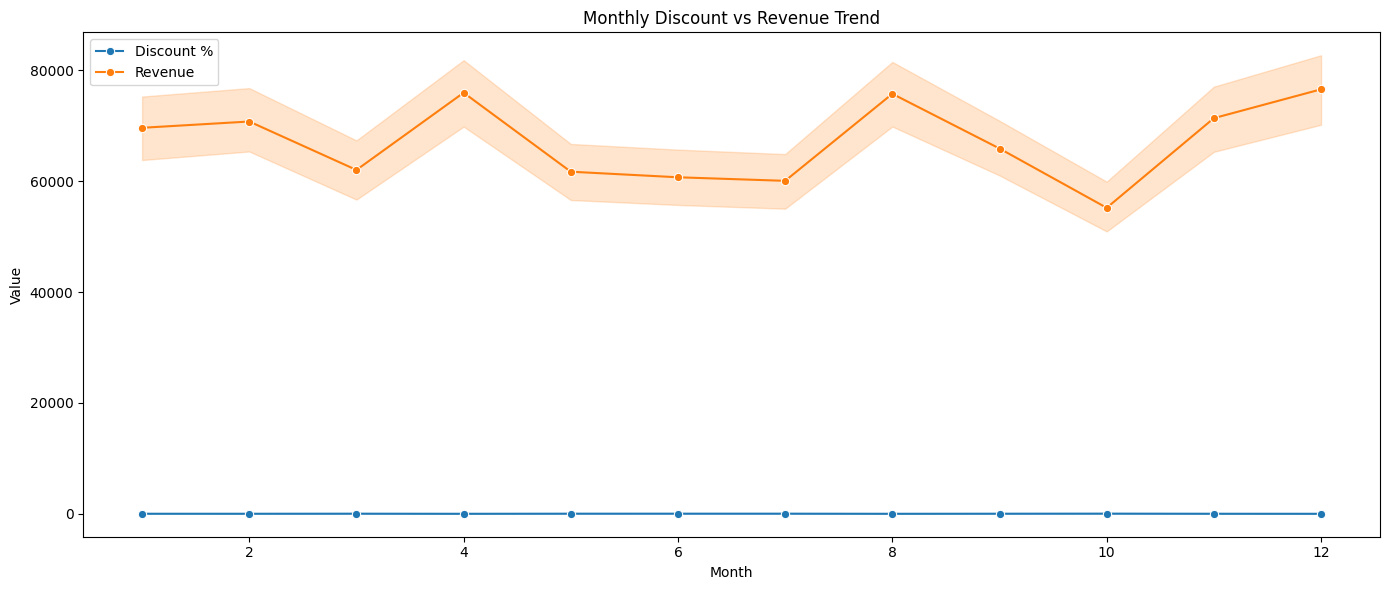

In [125]:
monthly_discount = df.groupby(['order_year', 'order_month'])[['discount_percent', 'final_amount_inr']].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_discount, x='order_month', y='discount_percent', label="Discount %", marker='o')
sns.lineplot(data=monthly_discount, x='order_month', y='final_amount_inr', label="Revenue", marker='o')
plt.title("Monthly Discount vs Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


Question 16
Study product rating patterns and their impact on sales. Analyze rating distributions, correlation with sales performance, and identify patterns across categories and price ranges


In [126]:
df["product_rating"].unique()

array([3.5, 4.5, 4.3, 3.6, 3.7, 3.2, 4.1, 3.4, 3.8, 4.6, 4.4, 4.2, 3.9,
       3. , 3.3, 4. , 4.7, 4.8, 3.1])

In [127]:
product_rating_analysis=df.groupby("product_rating")["final_amount_inr"].sum().reset_index()
product_rating_analysis

,product_rating,final_amount_inr
0,3.0,4.456235e+08
1,3.1,5.840665e+08
2,3.2,3.314049e+09
3,3.3,4.159562e+09
4,3.4,3.893172e+09
5,3.5,3.439496e+09
6,3.6,5.506579e+09
7,3.7,4.399908e+09
8,3.8,5.013589e+09
9,3.9,4.832195e+09


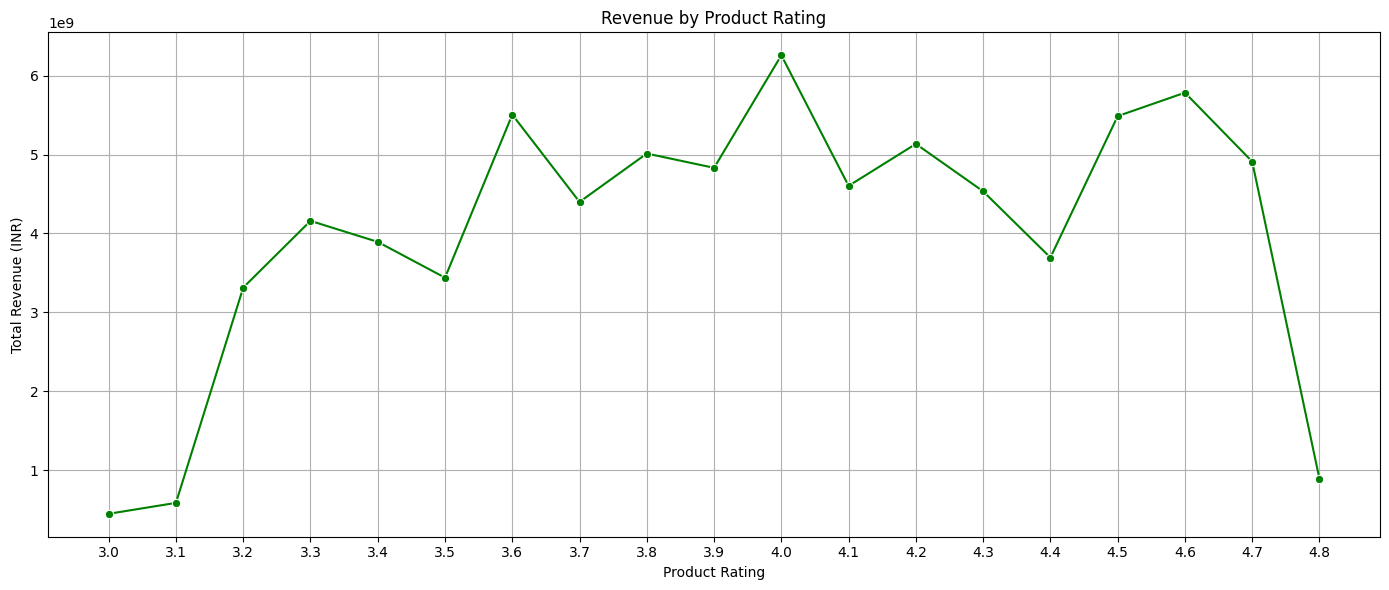

In [128]:
product_rating_analysis=df.groupby("product_rating")["final_amount_inr"].sum().reset_index()

analysis_product=product_rating_analysis.sort_values(by="product_rating",ascending=False)

plt.figure(figsize=(14, 6))


sns.lineplot(data=analysis_product,x="product_rating",y="final_amount_inr", marker='o', color="green")

plt.title("Revenue by Product Rating")
plt.xlabel("Product Rating")
plt.ylabel("Total Revenue (INR)")
plt.xticks(analysis_product["product_rating"])
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\offic\AppData\Local\Temp\ipykernel_8760\3619285776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="product_rating", palette="pastel")


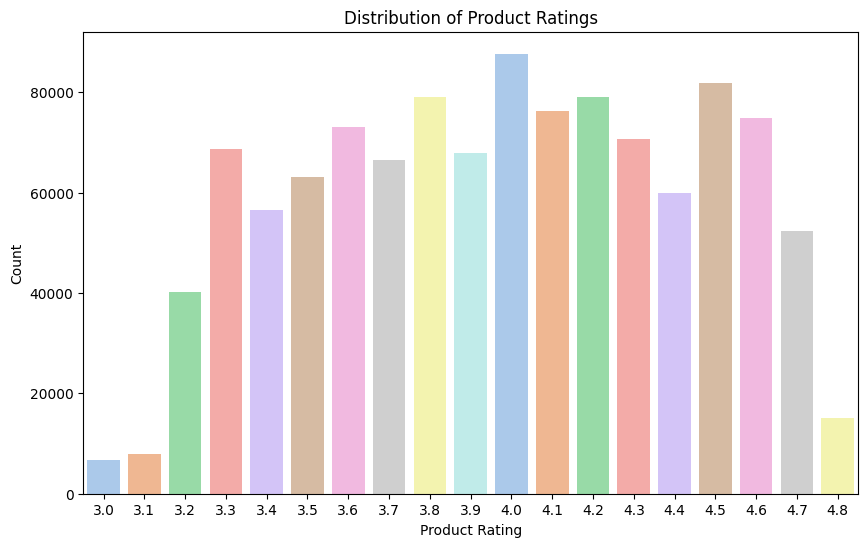

In [129]:
plt.figure(figsize=(10, 6))


sns.countplot(data=df, x="product_rating", palette="pastel")
plt.title("Distribution of Product Ratings")
plt.xlabel("Product Rating")
plt.ylabel("Count")
plt.show()


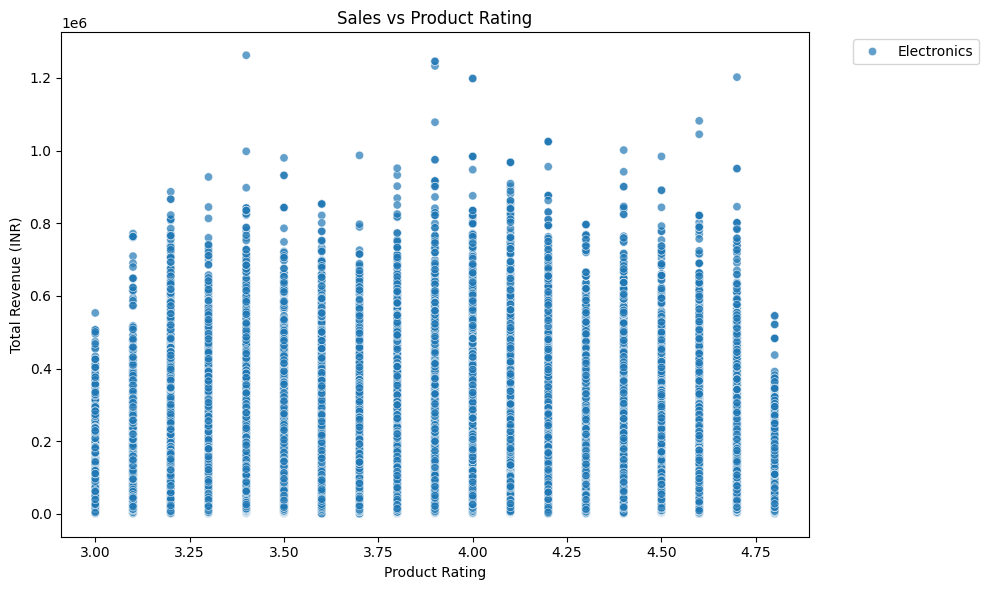

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="product_rating", y="final_amount_inr", hue="category", alpha=0.7)
plt.title("Sales vs Product Rating")
plt.xlabel("Product Rating")
plt.ylabel("Total Revenue (INR)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [131]:
df.to_csv("Amazon_sales.csv", index=False)


In [132]:
df.head()

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating,order_date_cleaned,corrected_price_inr
0,TXN_2023_00063013,2023-07-23,CUST_2023_00018393,PROD_000454,Vivo Y95 64GB Black,Electronics,Smartphones,Vivo,27340.84,21.57,...,4.0,Delivered,7,2023,3,0.20,True,3.5,2023-07-23,27340.8400
1,TXN_2021_00064486,20-07-2021,CUST_2015_00002865,PROD_000579,Realme Realme 3 128GB Black,Electronics,Smartphones,Realme,32907.49,0.00,...,5.0,Delivered,7,2021,3,0.21,False,4.5,2021-07-20,32907.4900
2,TXN_2017_00065617,2017-11-16,CUST_2016_00004057,PROD_000295,Vivo V7 32GB Blue,Electronics,Smartphones,Vivo,47052.18,21.91,...,5.0,Delivered,11,2017,4,0.24,True,4.3,2017-11-16,47052.1800
3,TXN_2020_00054393,2020-05-04,CUST_2020_00014574,PROD_001654,Alienware Pavilion 4GB RAM Silver,Electronics,Laptops,Alienware,238725.44,59.60,...,5.0,Delivered,5,2020,2,1.85,True,3.6,2020-05-04,2387.2544
4,TXN_2018_00071646,2018-10-09,CUST_2018_00006275,PROD_000095,Motorola Moto X Play 16GB White,Electronics,Smartphones,Motorola,25970.76,0.00,...,4.0,Delivered,10,2018,4,0.16,False,3.7,2018-10-09,25970.7600


In [133]:
df.tail()

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating,order_date_cleaned,corrected_price_inr
1127604,TXN_2018_00047331,2018-07-06,CUST_2017_00025689,PROD_000009,Apple iPhone 6 Plus 16GB Black,Electronics,Smartphones,Apple,134278.16,30.83,...,5.0,Delivered,7,2018,3,0.17,True,3.6,2018-07-06,134278.16
1127605,TXN_2022_00065321,2022-07-23,CUST_2021_00026763,PROD_001732,OnePlus iPad 8GB RAM Silver,Electronics,Tablets,OnePlus,97578.76,0.00,...,4.5,Delivered,7,2022,3,0.58,True,4.6,2022-07-23,97578.76
1127606,TXN_2023_00057908,01-07-2023,CUST_2023_00031035,PROD_001572,ASUS Inspiron 8GB RAM Black,Electronics,Laptops,ASUS,105284.29,43.31,...,4.0,Delivered,7,2023,3,1.37,True,4.2,2023-07-01,105284.29
1127607,TXN_2020_00035169,2020-04-12,CUST_2017_00005760,PROD_001582,ASUS Gaming 8GB RAM Silver,Electronics,Laptops,ASUS,72687.00,0.00,...,5.0,Delivered,4,2020,2,2.02,False,3.8,2020-04-12,72687.00
1127608,TXN_2022_00124835,2022-12-06,CUST_2022_00042212,PROD_001764,JBL Gaming Headset,Electronics,Audio,JBL,7092.55,0.00,...,5.0,Delivered,12,2022,4,0.71,True,3.3,2022-12-06,7092.55


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127609 entries, 0 to 1127608
Data columns (total 36 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transaction_id          1127609 non-null  object        
 1   order_date              1127609 non-null  object        
 2   customer_id             1127609 non-null  object        
 3   product_id              1127609 non-null  object        
 4   product_name            1127609 non-null  object        
 5   category                1127609 non-null  object        
 6   subcategory             1127609 non-null  object        
 7   brand                   1127609 non-null  object        
 8   original_price_inr      1127609 non-null  float64       
 9   discount_percent        1127609 non-null  float64       
 10  discounted_price_inr    1127609 non-null  float64       
 11  quantity                1127609 non-null  int64         
 12  subtotal_inr  